In [1]:
import pandas as pd 
import re
df = pd.read_csv("mobiles.csv")
df.head()

mobile_name    price  rating  specs_score  \
0                     OPPO Reno 11  ₹29,990    4.70         86.0   
1                   Poco X6 Pro 5G  ₹19,999    4.50         84.0   
2    Xiaomi Redmi Note 13 Pro Plus  ₹31,999    4.35         87.0   
3                 OPPO Reno 11 Pro  ₹40,990    4.75         88.0   
4  Xiaomi Redmi Note 13 Pro Max 5G  ₹33,999    4.00         87.0   

                                        connectivity  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                           processor  \
0       Dimensity 8200, Octa Core, 3.1 GHz Processor   
1  Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...   
2  Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...   
3       Dimensity 8200, Octa Core, 3.1 GHz Processor   
4    Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor   

                     storage                                   battery  \
0   8 GB RAM, 256 GB inbuilt   4800 mAh Battery with 67W Fast Charging   
1  12 GB RAM, 256 GB inbuilt   5500 mAh Battery with 90W Fast Charging   
2   8 GB RAM, 256 GB inbuilt  5000 mAh Battery with 120W Fast Charging   
3  12 GB RAM, 256 GB inbuilt   4600 mAh Battery with 80W Fast Charging   
4  12 GB RAM, 256 GB inbuilt  5200 mAh Battery with 120W Fast Charging   

                                             display  \
0  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
2  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
3  6.74 inches, 1240 x 2772 px, 120 Hz Display wi...   
4  6.67 inches, 1220 x 2712 px, 144 Hz Display wi...   

                                              camera  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
2  200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   
3  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   
4  200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...   

               extra_storage           os  
0                Android v14  No FM Radio  
1                Android v14  No FM Radio  
2  Memory Card Not Supported  Android v13  
3                Android v14  No FM Radio  
4  Memory Card Not Supported  Android v13

In [2]:
# Eliminar espacios adicionales en los nombres de las columnas
df.columns = df.columns.str.strip()

# Reemplazar espacios por guiones bajos (opcional)
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.describe()

rating  specs_score
count  1020.000000   865.000000
mean      4.367647    80.169942
std       0.239505     6.696636
min       3.450000    60.000000
25%       4.150000    76.000000
50%       4.350000    82.000000
75%       4.550000    85.000000
max       4.750000    89.000000

In [4]:
df = df.dropna()

df.head()

mobile_name    price  rating  specs_score  \
0                     OPPO Reno 11  ₹29,990    4.70         86.0   
1                   Poco X6 Pro 5G  ₹19,999    4.50         84.0   
2    Xiaomi Redmi Note 13 Pro Plus  ₹31,999    4.35         87.0   
3                 OPPO Reno 11 Pro  ₹40,990    4.75         88.0   
4  Xiaomi Redmi Note 13 Pro Max 5G  ₹33,999    4.00         87.0   

                                        connectivity  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                           processor  \
0       Dimensity 8200, Octa Core, 3.1 GHz Processor   
1  Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...   
2  Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...   
3       Dimensity 8200, Octa Core, 3.1 GHz Processor   
4    Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor   

                     storage                                   battery  \
0   8 GB RAM, 256 GB inbuilt   4800 mAh Battery with 67W Fast Charging   
1  12 GB RAM, 256 GB inbuilt   5500 mAh Battery with 90W Fast Charging   
2   8 GB RAM, 256 GB inbuilt  5000 mAh Battery with 120W Fast Charging   
3  12 GB RAM, 256 GB inbuilt   4600 mAh Battery with 80W Fast Charging   
4  12 GB RAM, 256 GB inbuilt  5200 mAh Battery with 120W Fast Charging   

                                             display  \
0  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
2  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
3  6.74 inches, 1240 x 2772 px, 120 Hz Display wi...   
4  6.67 inches, 1220 x 2712 px, 144 Hz Display wi...   

                                              camera  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
2  200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   
3  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   
4  200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...   

               extra_storage           os  
0                Android v14  No FM Radio  
1                Android v14  No FM Radio  
2  Memory Card Not Supported  Android v13  
3                Android v14  No FM Radio  
4  Memory Card Not Supported  Android v13

In [5]:
df.rename(columns={
    'mobile_name': 'Nombre',
    'price': 'Precio',
    'rating': 'Calificación',
    'specs_score': 'Puntaje_Especs',
    'connectivity': 'Conectividad',
    'processor': 'Procesador',
    'storage': 'Almacenamiento',
    'battery': 'Batería',
    'display': 'Pantalla',
    'camera': 'Cámara',
    'extra_storage': 'Almacenamiento_Extra',
    'os': 'Sistema_Operativo'
}, inplace=True)

df


Nombre   Precio  Calificación  Puntaje_Especs  \
0                        OPPO Reno 11  ₹29,990          4.70            86.0   
1                      Poco X6 Pro 5G  ₹19,999          4.50            84.0   
2       Xiaomi Redmi Note 13 Pro Plus  ₹31,999          4.35            87.0   
3                    OPPO Reno 11 Pro  ₹40,990          4.75            88.0   
4     Xiaomi Redmi Note 13 Pro Max 5G  ₹33,999          4.00            87.0   
...                               ...      ...           ...             ...   
1014                         OPPO A16  ₹12,599          4.45            69.0   
1015                   POCO M3 Pro 5G  ₹12,390          4.50            75.0   
1016                 Asus ROG Phone 6  ₹71,999          4.70            86.0   
1017         iQOO 7 (8GB RAM + 256GB)  ₹25,499          4.05            84.0   
1018                    Realme X7 Max  ₹23,999          4.55            84.0   

                                           Conectividad  \
0     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
...                                                 ...   
1014                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
1015     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster   
1016            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1017            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1018            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                             Procesador  \
0          Dimensity 8200, Octa Core, 3.1 GHz Processor   
1     Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...   
2     Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...   
3          Dimensity 8200, Octa Core, 3.1 GHz Processor   
4       Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor   
...                                                 ...   
1014            Helio G35, Octa Core, 2.3 GHz Processor   
1015     Dimensity 700 5G, Octa Core, 2.2 GHz Processor   
1016   Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
1017       Snapdragon 870, Octa Core, 3.2 GHz Processor   
1018         Dimensity 1200, Octa Core, 3 GHz Processor   

                 Almacenamiento                                   Batería  \
0      8 GB RAM, 256 GB inbuilt   4800 mAh Battery with 67W Fast Charging   
1     12 GB RAM, 256 GB inbuilt   5500 mAh Battery with 90W Fast Charging   
2      8 GB RAM, 256 GB inbuilt  5000 mAh Battery with 120W Fast Charging   
3     12 GB RAM, 256 GB inbuilt   4600 mAh Battery with 80W Fast Charging   
4     12 GB RAM, 256 GB inbuilt  5200 mAh Battery with 120W Fast Charging   
...                         ...                                       ...   
1014    4 GB RAM, 64 GB inbuilt                          5000 mAh Battery   
1015    4 GB RAM, 64 GB inbuilt   5000 mAh Battery with 18W Fast Charging   
1016  12 GB RAM, 256 GB inbuilt   6000 mAh Battery with 65W Fast Charging   
1017   8 GB RAM, 256 GB inbuilt   4400 mAh Battery with 66W Fast Charging   
1018   8 GB RAM, 128 GB inbuilt   4500 mAh Battery with 50W Fast Charging   

                                               Pantalla  \
0     6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1     6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
2     6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   
3     6.74 inches, 1240 x 2772 px, 120 Hz Display wi...   
4     6.67 inches, 1220 x 2712 px, 144 Hz Display wi...   
...                                                 ...   
1014  6.52 inches, 720 x 1600 px Display with Water ...   
1015  6.5 inches, 1080 x 2400 px, 90 Hz Display with...   
1016        6.78 inches, 1080 x 2448 px, 165 Hz Display   
1017  6.62 inches, 1080 x 2400 px, 120 Hz Display wi...   
1018  6.43 inches, 1080 x 2400 px, 120 Hz Display wi...   

                  

In [6]:
df.head(2)

Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                          Procesador  \
0       Dimensity 8200, Octa Core, 3.1 GHz Processor   
1  Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...   

              Almacenamiento                                  Batería  \
0   8 GB RAM, 256 GB inbuilt  4800 mAh Battery with 67W Fast Charging   
1  12 GB RAM, 256 GB inbuilt  5500 mAh Battery with 90W Fast Charging   

                                            Pantalla  \
0  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   

                                              Cámara Almacenamiento_Extra  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...          Android v14   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...          Android v14   

  Sistema_Operativo  
0       No FM Radio  
1       No FM Radio

In [7]:
# Separar la columna 'Almacenamiento' en dos columnas
df[['RAM', 'Memoria']] = df['Almacenamiento'].str.split(',', expand=True)

# Limpiar los espacios en blanco
df['RAM'] = df['RAM'].str.strip()
df['Memoria'] = df['Memoria'].str.strip()

# Eliminar la columna original 'specs'
df.drop(columns=['Almacenamiento'], inplace=True)

df.head(2)


Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                          Procesador  \
0       Dimensity 8200, Octa Core, 3.1 GHz Processor   
1  Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                            Pantalla  \
0  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   

                                              Cámara Almacenamiento_Extra  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...          Android v14   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...          Android v14   

  Sistema_Operativo        RAM         Memoria  
0       No FM Radio   8 GB RAM  256 GB inbuilt  
1       No FM Radio  12 GB RAM  256 GB inbuilt

In [8]:
# Separar la columna 'Procesador' en dos columnas
df[['Nombre_Procesador', 'Nucleos_Procesador','GHz_Procesador']] = df['Procesador'].str.split(',', expand=True)

# Limpiar los espacios en blanco
df['Nombre_Procesador'] = df['Nombre_Procesador'].str.strip()
df['Nucleos_Procesador'] = df['Nucleos_Procesador'].str.strip()
df['GHz_Procesador'] = df['GHz_Procesador'].str.strip()

# Eliminar la columna original 'specs'
df.drop(columns=['Procesador'], inplace=True)

df.head(2)

Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                            Pantalla  \
0  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
1  6.67 inches, 1220 x 2712 px, 120 Hz Display wi...   

                                              Cámara Almacenamiento_Extra  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...          Android v14   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...          Android v14   

  Sistema_Operativo        RAM         Memoria     Nombre_Procesador  \
0       No FM Radio   8 GB RAM  256 GB inbuilt        Dimensity 8200   
1       No FM Radio  12 GB RAM  256 GB inbuilt  Dimensity 8300 Ultra   

  Nucleos_Procesador      GHz_Procesador  
0          Octa Core   3.1 GHz Processor  
1          Octa Core  3.35 GHz Processor

In [9]:
# Usar una expresión regular para separar los elementos deseados
df[['Pulgadas', 'Resolucion_pantalla', 'Tasa_de_refresco_y_Camara_frontal']] = df['Pantalla'].str.split(',', expand=True)

# Limpiar los espacios en blanco
df['Pulgadas'] = df['Pulgadas'].str.strip()
df['Resolucion_pantalla'] = df['Resolucion_pantalla'].str.strip()
df['Tasa_de_refresco_y_Camara_frontal'] = df['Tasa_de_refresco_y_Camara_frontal'].str.strip()


# Eliminar la columna original 'Pantalla'
df.drop(columns=['Pantalla'], inplace=True)

df.head(2)


Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                              Cámara Almacenamiento_Extra  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...          Android v14   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...          Android v14   

  Sistema_Operativo        RAM         Memoria     Nombre_Procesador  \
0       No FM Radio   8 GB RAM  256 GB inbuilt        Dimensity 8200   
1       No FM Radio  12 GB RAM  256 GB inbuilt  Dimensity 8300 Ultra   

  Nucleos_Procesador      GHz_Procesador     Pulgadas Resolucion_pantalla  \
0          Octa Core   3.1 GHz Processor   6.7 inches      1080 x 2412 px   
1          Octa Core  3.35 GHz Processor  6.67 inches      1220 x 2712 px   

  Tasa_de_refresco_y_Camara_frontal  
0    120 Hz Display with Punch Hole  
1    120 Hz Display with Punch Hole

In [10]:
# Usar una expresión regular para separar los elementos deseados
df[['Tasa_de_refresco', 'Camara_frontal']] = df['Tasa_de_refresco_y_Camara_frontal'].str.extract(r'([0-9]+ Hz) (.*)')

# Limpiar los espacios en blanco
df['Tasa_de_refresco'] = df['Tasa_de_refresco'].str.strip()
df['Camara_frontal'] = df['Camara_frontal'].str.strip()

# Eliminar la columna original 'Tasa_de_refresco_y_Camara_frontal'
df.drop(columns=['Tasa_de_refresco_y_Camara_frontal'], inplace=True)

df.head(2)



Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                              Cámara Almacenamiento_Extra  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...          Android v14   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...          Android v14   

  Sistema_Operativo        RAM         Memoria     Nombre_Procesador  \
0       No FM Radio   8 GB RAM  256 GB inbuilt        Dimensity 8200   
1       No FM Radio  12 GB RAM  256 GB inbuilt  Dimensity 8300 Ultra   

  Nucleos_Procesador      GHz_Procesador     Pulgadas Resolucion_pantalla  \
0          Octa Core   3.1 GHz Processor   6.7 inches      1080 x 2412 px   
1          Octa Core  3.35 GHz Processor  6.67 inches      1220 x 2712 px   

  Tasa_de_refresco           Camara_frontal  
0           120 Hz  Display with Punch Hole  
1           120 Hz  Display with Punch Hole

In [11]:
# Crear una nueva columna combinada
df['Almacenamiento_extra_sistema_operativo'] = df['Almacenamiento_Extra'] + ', ' + df['Sistema_Operativo']

df.drop(columns=['Almacenamiento_Extra'], inplace=True)
df.drop(columns=['Sistema_Operativo'], inplace=True)

df.head(2)


Nombre   Precio  Calificación  Puntaje_Especs  \
0    OPPO Reno 11  ₹29,990           4.7            86.0   
1  Poco X6 Pro 5G  ₹19,999           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                              Cámara        RAM  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   8 GB RAM   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...  12 GB RAM   

          Memoria     Nombre_Procesador Nucleos_Procesador  \
0  256 GB inbuilt        Dimensity 8200          Octa Core   
1  256 GB inbuilt  Dimensity 8300 Ultra          Octa Core   

       GHz_Procesador     Pulgadas Resolucion_pantalla Tasa_de_refresco  \
0   3.1 GHz Processor   6.7 inches      1080 x 2412 px           120 Hz   
1  3.35 GHz Processor  6.67 inches      1220 x 2712 px           120 Hz   

            Camara_frontal Almacenamiento_extra_sistema_operativo  
0  Display with Punch Hole               Android v14, No FM Radio  
1  Display with Punch Hole               Android v14, No FM Radio

# Analisis descriptivo

### Precio: Analiza el rango de precios y calcula estadísticas como el precio promedio, mínimo y máximo.


In [12]:
# Eliminar símbolo de moneda y comas, y convertir a números
df['Precio'] = df['Precio'].str.replace('₹', '').str.replace(',', '').astype(float)


# Renombrar la columna 'Precio' al símbolo de la moneda
df.rename(columns={'Precio': 'Precio(₹)'}, inplace=True)

#Estadisticas descriptivas
round(df['Precio(₹)'].describe(),2)



count       865.00
mean      29887.83
std       30935.44
min        3499.00
25%       13200.00
50%       20999.00
75%       34990.00
max      480000.00
Name: Precio(₹), dtype: float64

### Calificación: Calcula la calificación promedio y distribuciones de las calificacion de los telefonos.

In [13]:
#Calificacion promedio
df['Calificación'].mean()

np.float64(4.375375722543352)

# Comparaciones:

### processor y specs_score: Compara el rendimiento del procesador con el puntaje de especificaciones para ver si hay una correlación.


In [14]:
# Función para extraer el valor numérico de GHz y convertirlo a float
def extract_ghz(value):
    if value is not None:
        return float(value.split()[0])
    return None  # Devolver None si el valor es None

# Aplicar la función a la columna 'GHz_Procesador'
df['GHz_Procesador'] = df['GHz_Procesador'].apply(extract_ghz)

# Calcular la correlación entre 'GHz_Procesador' y 'Puntaje_Especs'
df[['GHz_Procesador', 'Puntaje_Especs']].corr()


GHz_Procesador  Puntaje_Especs
GHz_Procesador        1.000000        0.633673
Puntaje_Especs        0.633673        1.000000

### Bateria y pantalla: Verifica si los teléfonos con baterías más grandes también tienen pantallas más grandes.

In [15]:
# Función para extraer la capacidad de la batería en mAh
def extract_battery_capacity(value):
    if 'mAh' in value:
        return int(value.split()[0].replace('\u2009', ''))
    return None

# Función para extraer la velocidad de carga en W
def extract_charging_speed(value):
    if 'W' in value:
        parts = value.split()
        for part in parts:
            if 'W' in part:
                return float(part.replace('W', '').replace('\u2009', ''))
    return None

# Función para extraer el tamaño de la pantalla en pulgadas
def extract_screen_size(value):
    if 'inches' in value:
        return float(value.split()[0])
    return None

# Aplicar las funciones para crear nuevas columnas
df['Capacidad_Batería_mAh'] = df['Batería'].apply(extract_battery_capacity)
df['Velocidad_Carga_W'] = df['Batería'].apply(extract_charging_speed)
df['Pulgadas'] = df['Pulgadas'].apply(extract_screen_size)


# Calcular la correlación entre 'Capacidad_Batería_mAh' y 'Tamaño_Pantalla_pulgadas'
df[['Capacidad_Batería_mAh', 'Pulgadas']].corr()


Capacidad_Batería_mAh  Pulgadas
Capacidad_Batería_mAh               1.000000  0.497969
Pulgadas                            0.497969  1.000000

In [16]:
df.head(2)

Nombre  Precio(₹)  Calificación  Puntaje_Especs  \
0    OPPO Reno 11    29990.0           4.7            86.0   
1  Poco X6 Pro 5G    19999.0           4.5            84.0   

                                        Conectividad  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                   Batería  \
0  4800 mAh Battery with 67W Fast Charging   
1  5500 mAh Battery with 90W Fast Charging   

                                              Cámara        RAM  \
0  50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...   8 GB RAM   
1  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...  12 GB RAM   

          Memoria     Nombre_Procesador Nucleos_Procesador  GHz_Procesador  \
0  256 GB inbuilt        Dimensity 8200          Octa Core            3.10   
1  256 GB inbuilt  Dimensity 8300 Ultra          Octa Core            3.35   

   Pulgadas Resolucion_pantalla Tasa_de_refresco           Camara_frontal  \
0      6.70      1080 x 2412 px           120 Hz  Display with Punch Hole   
1      6.67      1220 x 2712 px           120 Hz  Display with Punch Hole   

  Almacenamiento_extra_sistema_operativo  Capacidad_Batería_mAh  \
0               Android v14, No FM Radio                 4800.0   
1               Android v14, No FM Radio                 5500.0   

   Velocidad_Carga_W  
0               67.0  
1               90.0

# Agrupación y Segmentación:

### conectividad : Agrupa los teléfonos por tipos de conectividad (4G, 5G) y analiza las diferencias en otras características.


In [17]:
# Agrupar por Conectividad y calcular estadísticas descriptivas
df.groupby('Conectividad').agg({
    'GHz_Procesador': ['mean', 'std'],
    'Capacidad_Batería_mAh': ['mean', 'std'],
    'Pulgadas': ['mean', 'std'],
    'Precio(₹)': ['mean', 'std']
}).reset_index().head(5)



Conectividad GHz_Procesador            \
                                                               mean       std   
0           Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi       2.450000  0.353553   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, IR B...       2.400000  0.000000   
2      Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC       3.167143  0.204241   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC,...       3.190000  0.113578   
4                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi       2.424167  0.322788   

  Capacidad_Batería_mAh              Pulgadas               Precio(₹)  \
                   mean         std      mean       std          mean   
0           4933.333333  208.166600  6.666667  0.165025  55993.000000   
1           5000.000000    0.000000  6.670000  0.000000  19999.000000   
2           4771.428571  518.789801  6.622381  0.396370  69465.809524   
3           4954.000000  291.821863  6.853000  0.480580  47194.500000   
4           4944.888889  371.592510  6.618944  0.118229  20683.877778   

                 
            std  
0  60667.907719  
1   2000.000000  
2  31437.064557  
3  26843.514016  
4   7466.336009

### os: Agrupa por sistema operativo (Android, iOS) y compara especificaciones y precios.

In [18]:
df.groupby('Almacenamiento_extra_sistema_operativo').agg({
    'GHz_Procesador': ['mean', 'std'],
    'Capacidad_Batería_mAh': ['mean', 'std'],
    'Pulgadas': ['mean', 'std'],
    'Precio(₹)': ['mean', 'std']
}).reset_index().head(5)

Almacenamiento_extra_sistema_operativo GHz_Procesador            \
                                                               mean       std   
0  108 MP + 50 MP + 32 MP Triple Rear & 32 MP + 3...            NaN       NaN   
1  12 MP + 12 MP Dual Rear & 10 MP Front Camera, ...           3.08  0.207846   
2  13 MP + 12 MP Dual Rear & 32 MP Front Camera, ...           3.20       NaN   
3  200 MP + 12 MP + 12 MP Triple Rear & 32 MP + 3...            NaN       NaN   
4  200 MP + 48 MP + 13 MP Triple Rear & 50 MP Fro...            NaN       NaN   

  Capacidad_Batería_mAh             Pulgadas           Precio(₹)                
                   mean         std     mean  std           mean           std  
0           4820.000000         NaN     7.56  NaN  119900.000000           NaN  
1           3566.666667  230.940108     6.70  0.0   70142.333333  27646.186597  
2           3800.000000         NaN     6.90  NaN   72999.000000           NaN  
3           5000.000000         NaN     8.20  NaN  139990.000000           NaN  
4           5000.000000         NaN     8.20  NaN  119990.000000           NaN

# Optimización:

### battery: Filtra para encontrar teléfonos con la mejor relación batería/precio.


In [19]:
# Calcular la relación batería/precio
df['Relacion_Bateria_Precio'] = df['Capacidad_Batería_mAh'] / df['Precio(₹)']

# Ordenar por la relación batería/precio en orden descendente
df.sort_values(by='Relacion_Bateria_Precio', ascending=False).head()




Nombre  Precio(₹)  Calificación  \
227                        Realme C2s     3499.0          3.45   
405                     Itel P40 Plus     7589.0          4.55   
361  Xiaomi Redmi A2 (2GB RAM + 64GB)     5499.0          4.10   
917                          Itel P40     6599.0          4.00   
739        Itel P40 (4GB RAM + 128GB)     6630.0          4.35   

     Puntaje_Especs                    Conectividad  \
227            63.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
405            63.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
361            63.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
917            61.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
739            61.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   

                                     Batería  \
227                         4000 mAh Battery   
405  7000 mAh Battery with 18W Fast Charging   
361  5000 mAh Battery with 10W Fast Charging   
917  6000 mAh Battery with 18W Fast Charging   
739  6000 mAh Battery with 18W Fast Charging   

                                                Cámara       RAM  \
227         13 MP + 2 MP Dual Rear & 5 MP Front Camera  3 GB RAM   
405                13 MP Dual Rear & 8 MP Front Camera  4 GB RAM   
361  8 MP + Depth Sensor Dual Rear & 5 MP Front Camera  2 GB RAM   
917                13 MP Dual Rear & 5 MP Front Camera  4 GB RAM   
739                13 MP Dual Rear & 5 MP Front Camera  4 GB RAM   

            Memoria    Nombre_Procesador Nucleos_Procesador  GHz_Procesador  \
227   32 GB inbuilt           Helio  P22          Octa Core             2.0   
405  128 GB inbuilt          Unisoc T606          Octa Core             2.0   
361   64 GB inbuilt            Helio G36          Octa Core             2.2   
917   64 GB inbuilt  Spreadtrum  SC9863A          Octa Core             1.6   
739  128 GB inbuilt  Spreadtrum  SC9863A          Octa Core             1.6   

     Pulgadas                          Resolucion_pantalla Tasa_de_refresco  \
227      6.10  720 x 1560 px Display with Water Drop Notch              NaN   
405      6.80                                720 x 1640 px            90 Hz   
361      6.52  720 x 1600 px Display with Water Drop Notch              NaN   
917      6.60  720 x 1612 px Display with Water Drop Notch              NaN   
739      6.60  720 x 1612 px Display with Water Drop Notch              NaN   

              Camara_frontal  \
227                      NaN   
405  Display with Punch Hole   
361                      NaN   
917                      NaN   
739                      NaN   

                Almacenamiento_extra_sistema_operativo  Capacidad_Batería_mAh  \
227  Memory Card Supported, upto 128 GB, Android v9...                 4000.0   
405      Memory Card Supported, upto 1 TB, Android v13                 7000.0   
361    Memory Card Supported, upto 512 GB, Android v13                 5000.0   
917    Memory Card Supported, upto 512 GB, Android v12                 6000.0   
739    Memory Card Supported, upto 512 GB, Android v12                 6000.0   

     Velocidad_Carga_W  Relacion_Bateria_Precio  
227                NaN                 1.143184  
405               18.0                 0.922388  
361               10.0                 0.909256  
917               18.0                 0.909229  
739               18.0                 0.904977

### extra_storage: Busca modelos que ofrezcan la opción de almacenamiento adicional y compáralos en términos de precio y especificaciones.


In [20]:
# Función para extraer los valores numéricos del almacenamiento
def extract_storage(value):
    if value and 'GB' in value:
        return int(value.split()[0].replace('\u2009', ''))
    return None

# Aplicar la función a la columna 'Almacenamiento'
df['Memoria'] = df['Memoria'].apply(extract_storage)

# Filtrar teléfonos con almacenamiento adicional
df_filtrado = df[df['Memoria'] > 256]

# Calcular la relación batería/precio
df_filtrado['Relacion_Bateria_Precio'] = df_filtrado['Capacidad_Batería_mAh'] / df_filtrado['Precio(₹)']

# Ordenar por la relación batería/precio en orden descendente
df_filtrado = df_filtrado.sort_values(by='Relacion_Bateria_Precio', ascending=False)

df_filtrado.head(5)

C:\Users\Yoyobastidas\AppData\Local\Temp\ipykernel_27208\2970180972.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Relacion_Bateria_Precio'] = df_filtrado['Capacidad_Batería_mAh'] / df_filtrado['Precio(₹)']


Nombre  Precio(₹)  \
876                                     Vivo Y100i 5G    17990.0   
323                            Tecno Camon 20 Premier    24999.0   
302                     Honor 90 5G (12GB RAM +512GB)    33999.0   
41   Xiaomi Redmi Note 13 Pro Plus (12GB RAM + 512GB)    35999.0   
456                                     Xiaomi Civi 4    34990.0   

     Calificación  Puntaje_Especs  \
876          4.40            80.0   
323          4.50            89.0   
302          4.45            89.0   
41           4.55            88.0   
456          4.60            80.0   

                                          Conectividad  \
876                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
323            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
302            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
41   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
456  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                      Batería  \
876   5000 mAh Battery with 44W Fast Charging   
323   5000 mAh Battery with 45W Fast Charging   
302   5000 mAh Battery with 66W Fast Charging   
41   5000 mAh Battery with 120W Fast Charging   
456   4600 mAh Battery with 80W Fast Charging   

                                                Cámara        RAM  Memoria  \
876         50 MP + 2 MP Dual Rear & 8 MP Front Camera  12 GB RAM    512.0   
323  108 MP + 50 MP + 2 MP Triple Rear & 32 MP Fron...   8 GB RAM    512.0   
302  200 MP + 12 MP + 2 MP Triple Rear & 50 MP Fron...  12 GB RAM    512.0   
41   200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...  12 GB RAM    512.0   
456  108 MP + 8 MP + 2 MP Triple Rear & 32 MP + 32 ...  12 GB RAM    512.0   

                          Nombre_Procesador   Nucleos_Procesador  \
876                         Dimensity  6020            Octa Core   
323                          Dimensity 8050            Octa Core   
302  Snapdragon 7 Gen 1 Accelerated Edition            Octa Core   
41                     Dimensity 7200 Ultra            Octa Core   
456                    Dimensity 8300 Ultra  Octa Core Processor   

     GHz_Procesador  Pulgadas Resolucion_pantalla Tasa_de_refresco  \
876            2.20      6.64      1080 x 2388 px            90 Hz   
323            3.00      6.67      1080 x 2400 px           120 Hz   
302            2.36      6.70      1200 x 2664 px           120 Hz   
41             2.80      6.67      1220 x 2712 px           120 Hz   
456             NaN      6.67      1080 x 2400 px           144 Hz   

                    Camara_frontal  Almacenamiento_extra_sistema_operativo  \
876  Display with Water Drop Notch       Memory Card (Hybrid), Android v13   
323        Display with Punch Hole                  Android v13, Bluetooth   
302        Display with Punch Hole                Android v13, No FM Radio   
41         Display with Punch Hole  Memory Card Not Supported, Android v13   
456        Display with Punch Hole                Android v14, No FM Radio   

     Capacidad_Batería_mAh  Velocidad_Carga_W  Relacion_Bateria_Precio  
876                 5000.0               44.0                 0.277932  
323                 5000.0               45.0                 0.200008  
302                 5000.0               66.0                 0.147063  
41                  5000.0              120.0                 0.138893  
456                 4600.0               80.0                 0.131466

In [21]:
# Eliminar la columna original 'Bateria'
df.drop(columns=['Batería'], inplace=True)

In [22]:
# Separar la Camaras en varias Columnas
df[['triple_trasera', 'camara_frontal']] = df['Cámara'].str.split('&', expand=True)
df['triple_trasera'] = df['triple_trasera'].str.replace('Triple Rear', '')
df['camara_frontal'] = df['camara_frontal'].str.replace('Front Camera', '')

# Limpiar los espacios en blanco
df['triple_trasera'] = df['triple_trasera'].str.strip()
df['camara_frontal'] = df['camara_frontal'].str.strip()

# Eliminar la columna original 'Camara'
df.drop(columns=['Cámara'], inplace=True)

In [23]:
df.head(1)

Nombre  Precio(₹)  Calificación  Puntaje_Especs  \
0  OPPO Reno 11    29990.0           4.7            86.0   

                                        Conectividad       RAM  Memoria  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    256.0   

  Nombre_Procesador Nucleos_Procesador  GHz_Procesador  Pulgadas  \
0    Dimensity 8200          Octa Core             3.1       6.7   

  Resolucion_pantalla Tasa_de_refresco           Camara_frontal  \
0      1080 x 2412 px           120 Hz  Display with Punch Hole   

  Almacenamiento_extra_sistema_operativo  Capacidad_Batería_mAh  \
0               Android v14, No FM Radio                 4800.0   

   Velocidad_Carga_W  Relacion_Bateria_Precio        triple_trasera  \
0               67.0                 0.160053  50 MP + 32 MP + 8 MP   

  camara_frontal  
0          32 MP

In [24]:
# Separar la columna en varias columnas con "Sí" o "No"
for tipo in tipos_conectividad:
    df[tipo] = df['Conectividad'].apply(lambda x: 'Sí' if tipo in x else 'No')

# Eliminar la columna original 'Conectividad'
df.drop(columns=['Conectividad'], inplace=True)


NameError: name 'tipos_conectividad' is not defined

In [25]:
df.head(1)

Nombre  Precio(₹)  Calificación  Puntaje_Especs  \
0  OPPO Reno 11    29990.0           4.7            86.0   

                                        Conectividad       RAM  Memoria  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    256.0   

  Nombre_Procesador Nucleos_Procesador  GHz_Procesador  Pulgadas  \
0    Dimensity 8200          Octa Core             3.1       6.7   

  Resolucion_pantalla Tasa_de_refresco           Camara_frontal  \
0      1080 x 2412 px           120 Hz  Display with Punch Hole   

  Almacenamiento_extra_sistema_operativo  Capacidad_Batería_mAh  \
0               Android v14, No FM Radio                 4800.0   

   Velocidad_Carga_W  Relacion_Bateria_Precio        triple_trasera  \
0               67.0                 0.160053  50 MP + 32 MP + 8 MP   

  camara_frontal  
0          32 MP

In [26]:
# Crear la columna de relación calidad-precio
df['relacion_calidad_precio'] = df['Precio(₹)'] / df['Puntaje_Especs']
df.head(1)

Nombre  Precio(₹)  Calificación  Puntaje_Especs  \
0  OPPO Reno 11    29990.0           4.7            86.0   

                                        Conectividad       RAM  Memoria  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    256.0   

  Nombre_Procesador Nucleos_Procesador  GHz_Procesador  ...  \
0    Dimensity 8200          Octa Core             3.1  ...   

   Resolucion_pantalla Tasa_de_refresco           Camara_frontal  \
0       1080 x 2412 px           120 Hz  Display with Punch Hole   

  Almacenamiento_extra_sistema_operativo Capacidad_Batería_mAh  \
0               Android v14, No FM Radio                4800.0   

   Velocidad_Carga_W  Relacion_Bateria_Precio        triple_trasera  \
0               67.0                 0.160053  50 MP + 32 MP + 8 MP   

  camara_frontal relacion_calidad_precio  
0          32 MP               348.72093  

[1 rows x 21 columns]

In [27]:
# Función para extraer el sistema operativo
def extraer_sistema_operativo(texto):
    sistemas_operativos = ['Android', 'iOS', 'Windows', 'Symbian']
    for so in sistemas_operativos:
        if so in texto:
            return texto.split(',')[0].strip()
    return 'Desconocido'

# Función para verificar soporte de tarjeta de memoria
def soporta_tarjeta_memoria(texto):
    if 'Memory Card Not Supported' in texto:
        return 'No'
    elif 'Memory Card' in texto:
        return 'Sí'
    return 'Desconocido'

# Función para verificar la presencia de radio FM
def tiene_radio_fm(texto):
    if 'No FM Radio' in texto:
        return 'No'
    elif 'FM Radio' in texto:
        return 'Sí'
    return 'Desconocido'

# Aplicar las funciones y crear nuevas columnas
df['sistema_operativo'] = df['Almacenamiento_extra_sistema_operativo'].apply(extraer_sistema_operativo)
df['soporte_tarjeta_memoria'] = df['Almacenamiento_extra_sistema_operativo'].apply(soporta_tarjeta_memoria)
df['tiene_radio_fm'] = df['Almacenamiento_extra_sistema_operativo'].apply(tiene_radio_fm)




In [28]:
df.head(1)

Nombre  Precio(₹)  Calificación  Puntaje_Especs  \
0  OPPO Reno 11    29990.0           4.7            86.0   

                                        Conectividad       RAM  Memoria  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    256.0   

  Nombre_Procesador Nucleos_Procesador  GHz_Procesador  ...  \
0    Dimensity 8200          Octa Core             3.1  ...   

   Almacenamiento_extra_sistema_operativo Capacidad_Batería_mAh  \
0                Android v14, No FM Radio                4800.0   

  Velocidad_Carga_W Relacion_Bateria_Precio        triple_trasera  \
0              67.0                0.160053  50 MP + 32 MP + 8 MP   

   camara_frontal  relacion_calidad_precio  sistema_operativo  \
0           32 MP                348.72093        Android v14   

  soporte_tarjeta_memoria tiene_radio_fm  
0             Desconocido             No  

[1 rows x 24 columns]

In [29]:
# Tasa de conversión de INR a USD (ejemplo)
tasa_conversion = 0.012

# Crear una nueva columna para los precios en USD
df['Precio($)'] = df['Precio(₹)'] * tasa_conversion

# Eliminar la columna original 'Precio Rupias'
df.drop(columns=['Precio(₹)'], inplace=True)

df.head(1)

Nombre  Calificación  Puntaje_Especs  \
0  OPPO Reno 11           4.7            86.0   

                                        Conectividad       RAM  Memoria  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    256.0   

  Nombre_Procesador Nucleos_Procesador  GHz_Procesador  Pulgadas  ...  \
0    Dimensity 8200          Octa Core             3.1       6.7  ...   

  Capacidad_Batería_mAh Velocidad_Carga_W Relacion_Bateria_Precio  \
0                4800.0              67.0                0.160053   

         triple_trasera  camara_frontal  relacion_calidad_precio  \
0  50 MP + 32 MP + 8 MP           32 MP                348.72093   

   sistema_operativo soporte_tarjeta_memoria tiene_radio_fm  Precio($)  
0        Android v14             Desconocido             No     359.88  

[1 rows x 24 columns]

Telefonos por menos de 200$

In [30]:
# Filtra el DataFrame por teléfonos con un precio menor a $200
df_precio = df.query('`Precio($)` < 200')
df_precio


Nombre  Calificación  Puntaje_Especs  \
6                    Motorola Moto G34 5G          4.65            75.0   
9                              Poco X6 5G          4.10            82.0   
11                            Vivo Y28 5G          4.35            75.0   
12                   Motorola Moto G54 5G          4.30            84.0   
13                    Xiaomi Redmi 13C 5G          4.50            74.0   
...                                   ...           ...             ...   
1011             Xiaomi Redmi Note 10T 5G          4.55            75.0   
1012  Xiaomi Mi 11 Lite (8GB RAM + 128GB)          4.60            82.0   
1013                      Xiaomi Redmi 10          4.60            71.0   
1014                             OPPO A16          4.45            69.0   
1015                       POCO M3 Pro 5G          4.50            75.0   

                                           Conectividad       RAM  Memoria  \
6              Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi  4 GB RAM    128.0   
9     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...  8 GB RAM    128.0   
11                   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi  4 GB RAM    128.0   
12                   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi  8 GB RAM    128.0   
13                   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi  4 GB RAM    128.0   
...                                                 ...       ...      ...   
1011     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster  4 GB RAM     64.0   
1012         Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster  8 GB RAM    128.0   
1013                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi  4 GB RAM     64.0   
1014                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi  4 GB RAM     64.0   
1015     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster  4 GB RAM     64.0   

        Nombre_Procesador Nucleos_Procesador  GHz_Procesador  Pulgadas  ...  \
6          Snapdragon 695          Octa Core             2.2      6.50  ...   
9     Snapdragon 7s Gen 2          Octa Core             2.4      6.67  ...   
11         Dimensity 6020          Octa Core             2.2      6.56  ...   
12         Dimensity 7020          Octa Core             2.2      6.50  ...   
13    Dimensity 6100 Plus          Octa Core             2.2      6.74  ...   
...                   ...                ...             ...       ...  ...   
1011        Dimensity 700          Octa Core             2.2      6.50  ...   
1012      Snapdragon 732G          Octa Core             2.3      6.55  ...   
1013       Snapdragon 680          Octa Core             2.4      6.70  ...   
1014            Helio G35          Octa Core             2.3      6.52  ...   
1015     Dimensity 700 5G          Octa Core             2.2      6.50  ...   

     Capacidad_Batería_mAh Velocidad_Carga_W Relacion_Bateria_Precio  \
6                   5000.0              18.0                0.454587   
9                   5100.0              67.0                0.318770   
11                  5000.0              15.0                0.357168   
12                  6000.0              33.0                0.428602   
13                  5000.0              18.0                0.454587   
...                    ...               ...                     ...   
1011                5000.0              18.0                0.365230   
1012                4250.0              33.0                0.265642   
1013                6000.0              18.0                0.670466   
1014                5000.0               NaN                0.396857   
1015                5000.0              18.0                0.403551   

                      triple_trasera  camara_frontal  relacion_calidad_precio  \
6             50 MP + 2 MP Dual Rear           16 MP               146.653333   
9                64 MP + 8 MP + 2 MP           16 MP               195.109756   
11            50 MP + 2 MP Dual Rear            8 MP               186.653333   
12            50 MP + 8 MP Dual Rear           16 MP       

In [31]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.gsmarena.com/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra las secciones de cada categoría de teléfono
phone_sections = soup.find_all('div', class_='brandmenu-v2')

for section in phone_sections:
    phone_links = section.find_all('a')
    for link in phone_links:
        phone_url = url + link['href']
        print(phone_url)


ModuleNotFoundError: No module named 'bs4'

In [ ]:
import requests
from bs4 import BeautifulSoup

# Función para extraer información de una página de teléfono
def extract_phone_data(phone_url):
    response = requests.get(phone_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    phone_name_element = soup.find('h1', {'class': 'specs-phone-name-title'})
    phone_name = phone_name_element.text.strip() if phone_name_element else 'Unknown'
    
    specs_section = soup.find('div', {'id': 'specs-list'})
    
    phone_specs = []
    if specs_section:
        spec_categories = specs_section.find_all('table')
        for category in spec_categories:
            specs = category.find_all('td', class_='nfo')
            for spec in specs:
                phone_specs.append(spec.text.strip())

    phone_data = {
        'name': phone_name,
        'specs': phone_specs
    }
    
    return phone_data

# Función para obtener los enlaces de los modelos de teléfonos desde la página de una marca
def get_model_links(brand_url):
    response = requests.get(brand_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    model_links = []
    phone_links = soup.find_all('a', href=True)
    for link in phone_links:
        if '/gsmarena.com/' in link['href']:
            model_links.append('https://www.gsmarena.com/' + link['href'])
    return model_links

# Obtiene los enlaces de las marcas desde la página de fabricantes
url = 'https://www.gsmarena.com/makers.php3'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

brand_links = []
for link in soup.find_all('a', href=True):
    if 'phones' in link['href']:
        brand_links.append('https://www.gsmarena.com/' + link['href'])

print("Enlaces de marcas obtenidos: ", brand_links[:5])  # Imprime los primeros 5 enlaces de marcas para verificar

# Ahora obtenemos los enlaces de los modelos específicos de cada marca
model_urls = []
for brand_url in brand_links:
    model_urls.extend(get_model_links(brand_url))

print("Enlaces de modelos obtenidos: ", model_urls[:5])  # Imprime los primeros 5 enlaces de modelos para verificar

# Extrae y muestra datos para los primeros 5 teléfonos como ejemplo
for model_url in model_urls[:5]:
    phone_data = extract_phone_data(model_url)
    print(phone_data)


In [32]:

# Guardar el DataFrame en un archivo de Excel
df.to_excel('datos.xlsx', index=False)
df.to_csv('datos.csv', index=False)

In [33]:
# Paso 1: Eliminar caracteres no numéricos (incluyendo espacios no estándar)
df['RAM'] = df['RAM'].str.replace(r'[^0-9]', '', regex=True)

# Paso 2: Convertir la columna a tipo numérico
df['RAM'] = pd.to_numeric(df['RAM'])

# Mostrar el DataFrame resultante
print(df)

                               Nombre  Calificación  Puntaje_Especs  \
0                        OPPO Reno 11          4.70            86.0   
1                      Poco X6 Pro 5G          4.50            84.0   
2       Xiaomi Redmi Note 13 Pro Plus          4.35            87.0   
3                    OPPO Reno 11 Pro          4.75            88.0   
4     Xiaomi Redmi Note 13 Pro Max 5G          4.00            87.0   
...                               ...           ...             ...   
1014                         OPPO A16          4.45            69.0   
1015                   POCO M3 Pro 5G          4.50            75.0   
1016                 Asus ROG Phone 6          4.70            86.0   
1017         iQOO 7 (8GB RAM + 256GB)          4.05            84.0   
1018                    Realme X7 Max          4.55            84.0   

                                           Conectividad  RAM  Memoria  \
0     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    8    256.0   
1

In [34]:

df_numerico = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Mostrar la matriz de correlación
matriz_correlacion

Calificación  Puntaje_Especs       RAM   Memoria  \
Calificación                 1.000000        0.009945  0.045109  0.049788   
Puntaje_Especs               0.009945        1.000000  0.209720  0.575966   
RAM                          0.045109        0.209720  1.000000  0.689445   
Memoria                      0.049788        0.575966  0.689445  1.000000   
GHz_Procesador               0.026154        0.633673  0.217751  0.481231   
Pulgadas                     0.050424        0.255401  0.087986  0.182534   
Capacidad_Batería_mAh        0.044914       -0.048380  0.003270 -0.043383   
Velocidad_Carga_W            0.018091        0.473394  0.201584  0.462445   
Relacion_Bateria_Precio      0.022267       -0.776196 -0.234381 -0.528324   
relacion_calidad_precio     -0.037100        0.369517  0.172603  0.391723   
Precio($)                   -0.036085        0.412966  0.173105  0.416370   

                         GHz_Procesador  Pulgadas  Capacidad_Batería_mAh  \
Calificación                   0.026154  0.050424               0.044914   
Puntaje_Especs                 0.633673  0.255401              -0.048380   
RAM                            0.217751  0.087986               0.003270   
Memoria                        0.481231  0.182534              -0.043383   
GHz_Procesador                 1.000000  0.046007              -0.217758   
Pulgadas                       0.046007  1.000000               0.497969   
Capacidad_Batería_mAh         -0.217758  0.497969               1.000000   
Velocidad_Carga_W              0.591612  0.318355              -0.026306   
Relacion_Bateria_Precio       -0.722442 -0.009629               0.347064   
relacion_calidad_precio        0.584447  0.023235              -0.304214   
Precio($)                      0.593544  0.047618              -0.287886   

                         Velocidad_Carga_W  Relacion_Bateria_Precio  \
Calificación                      0.018091                 0.022267   
Puntaje_Especs                    0.473394                -0.776196   
RAM                               0.201584                -0.234381   
Memoria                           0.462445                -0.528324   
GHz_Procesador                    0.591612                -0.722442   
Pulgadas                          0.318355                -0.009629   
Capacidad_Batería_mAh            -0.026306                 0.347064   
Velocidad_Carga_W                 1.000000                -0.538689   
Relacion_Bateria_Precio          -0.538689                 1.000000   
relacion_calidad_precio           0.326352                -0.585647   
Precio($)                         0.333629                -0.592634   

                         relacion_calidad_precio  Precio($)  
Calificación                           -0.037100  -0.036085  
Puntaje_Especs                          0.369517   0.412966  
RAM                                     0.172603   0.173105  
Memoria                                 0.391723   0.416370  
GHz_Procesador                          0.584447   0.593544  
Pulgadas                                0.023235   0.047618  
Capacidad_Batería_mAh                  -0.304214  -0.287886  
Velocidad_Carga_W                       0.326352   0.333629  
Relacion_Bateria_Precio                -0.585647  -0.592634  
relacion_calidad_precio                 1.000000   0.997122  
Precio($)                               0.997122   1.000000

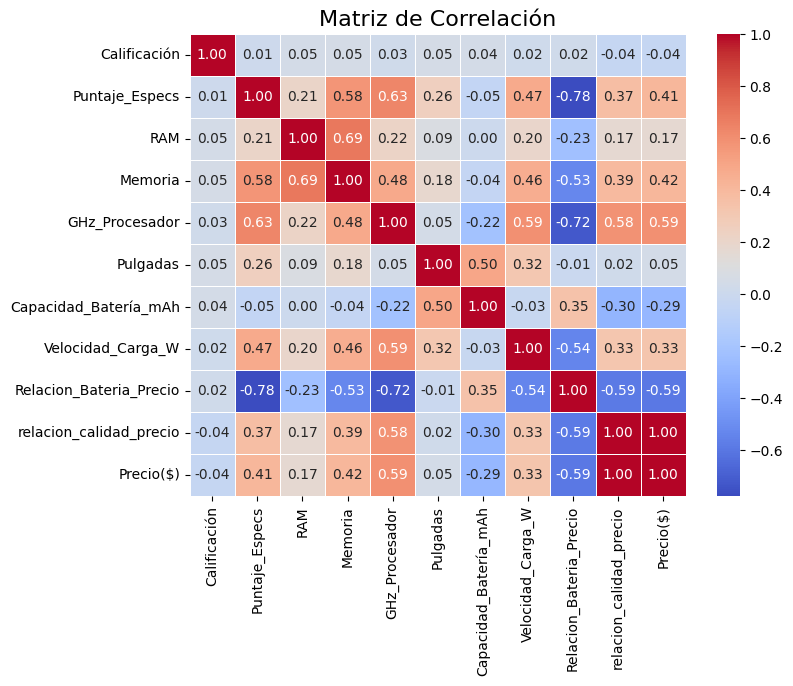

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título
plt.title('Matriz de Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()

In [36]:
variables_dependientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio($)']
variables_independientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio($)']

In [37]:
# Renombrar la columna 'Precio($)' a 'Precio_USD'
df = df.rename(columns={'Precio($)': 'Precio_USD'})

In [38]:
variables_dependientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio_USD']
variables_independientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio_USD']

In [39]:
import pandas as pd
import statsmodels.formula.api as smf

# Listas de variables dependientes e independientes
variables_dependientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio_USD']
variables_independientes = ['Memoria', 'GHz_Procesador', 'Pulgadas', 'Capacidad_Batería_mAh', 'Velocidad_Carga_W', 'Relacion_Bateria_Precio', 'relacion_calidad_precio', 'Precio_USD']

# Diccionario para almacenar los resultados
resultados = {}

# Ajustar modelos para todas las combinaciones
for dependiente in variables_dependientes:
    for independiente in variables_independientes:
        if dependiente != independiente:  # Evitar usar la misma variable como dependiente e independiente
            formula = f'{dependiente} ~ {independiente}'  # Crear la fórmula dinámicamente
            modelo = smf.ols(formula, data=df).fit()  # Ajustar el modelo
            resultados[(dependiente, independiente)] = modelo.rsquared  # Almacenar el R²

# Mostrar los resultados
for (dependiente, independiente), r2 in resultados.items():
    print(f'Dependiente: {dependiente}, Independiente: {independiente}, R²: {r2:.4f}')

Dependiente: Memoria, Independiente: GHz_Procesador, R²: 0.2316
Dependiente: Memoria, Independiente: Pulgadas, R²: 0.0333
Dependiente: Memoria, Independiente: Capacidad_Batería_mAh, R²: 0.0019
Dependiente: Memoria, Independiente: Velocidad_Carga_W, R²: 0.2139
Dependiente: Memoria, Independiente: Relacion_Bateria_Precio, R²: 0.2791
Dependiente: Memoria, Independiente: relacion_calidad_precio, R²: 0.1534
Dependiente: Memoria, Independiente: Precio_USD, R²: 0.1734
Dependiente: GHz_Procesador, Independiente: Memoria, R²: 0.2316
Dependiente: GHz_Procesador, Independiente: Pulgadas, R²: 0.0021
Dependiente: GHz_Procesador, Independiente: Capacidad_Batería_mAh, R²: 0.0474
Dependiente: GHz_Procesador, Independiente: Velocidad_Carga_W, R²: 0.3500
Dependiente: GHz_Procesador, Independiente: Relacion_Bateria_Precio, R²: 0.5219
Dependiente: GHz_Procesador, Independiente: relacion_calidad_precio, R²: 0.3416
Dependiente: GHz_Procesador, Independiente: Precio_USD, R²: 0.3523
Dependiente: Pulgadas, Ind

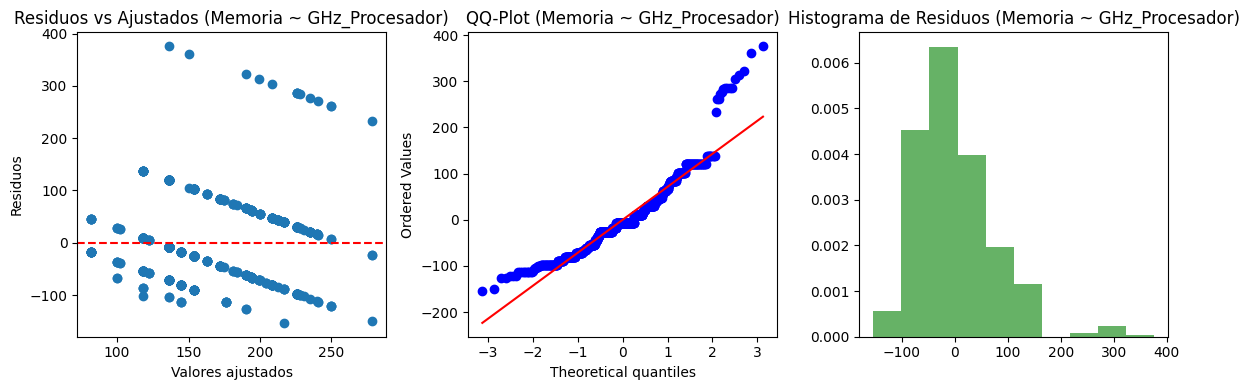

Prueba de Shapiro-Wilk para Memoria ~ GHz_Procesador: p-valor = 0.0000


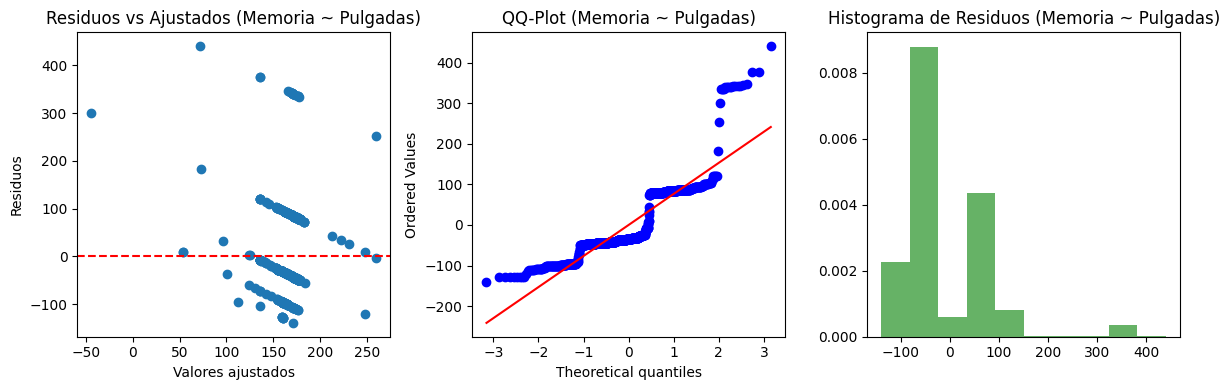

Prueba de Shapiro-Wilk para Memoria ~ Pulgadas: p-valor = 0.0000


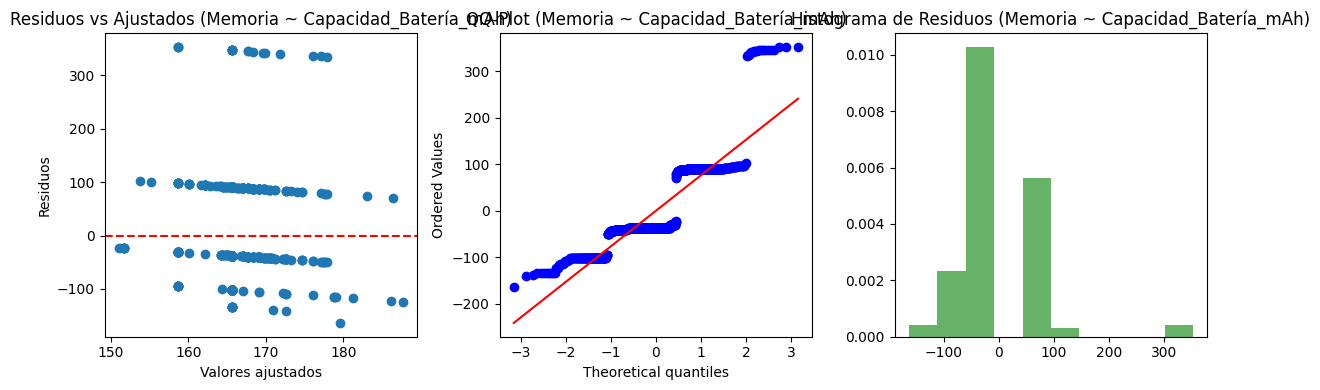

Prueba de Shapiro-Wilk para Memoria ~ Capacidad_Batería_mAh: p-valor = 0.0000


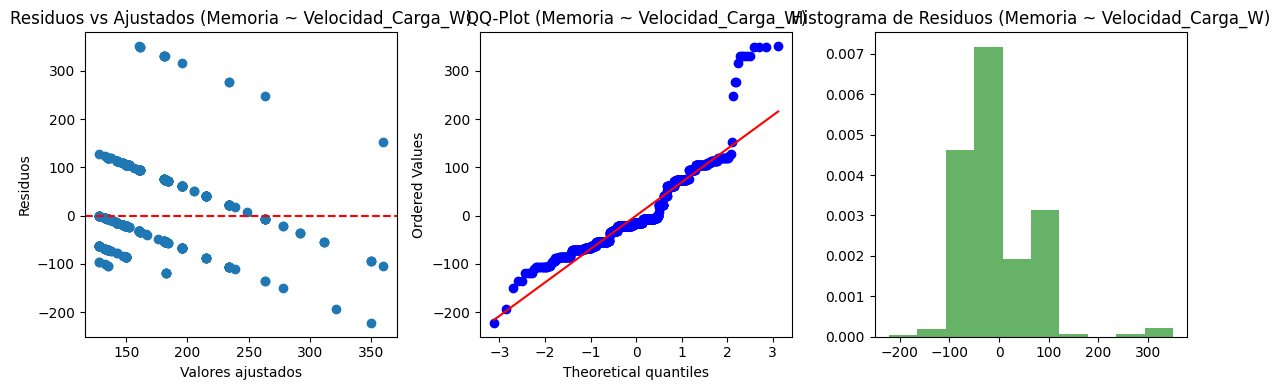

Prueba de Shapiro-Wilk para Memoria ~ Velocidad_Carga_W: p-valor = 0.0000


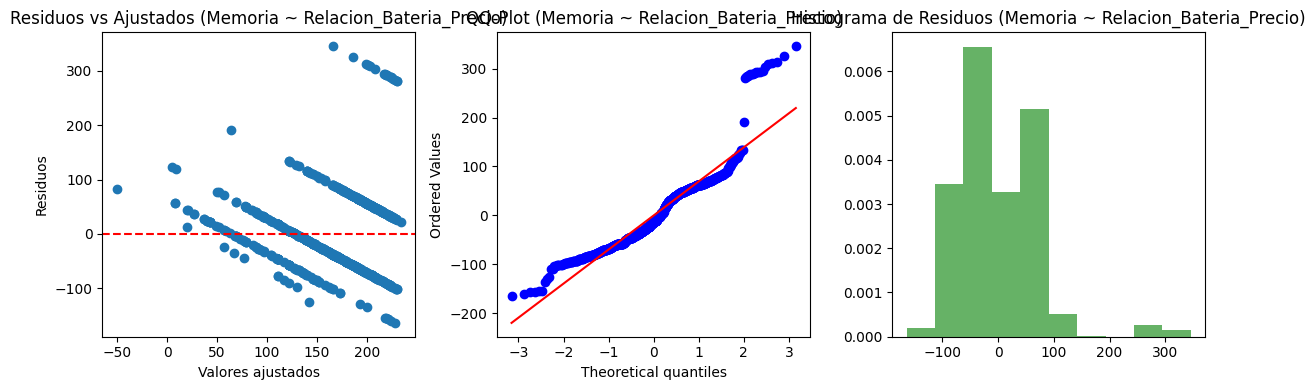

Prueba de Shapiro-Wilk para Memoria ~ Relacion_Bateria_Precio: p-valor = 0.0000


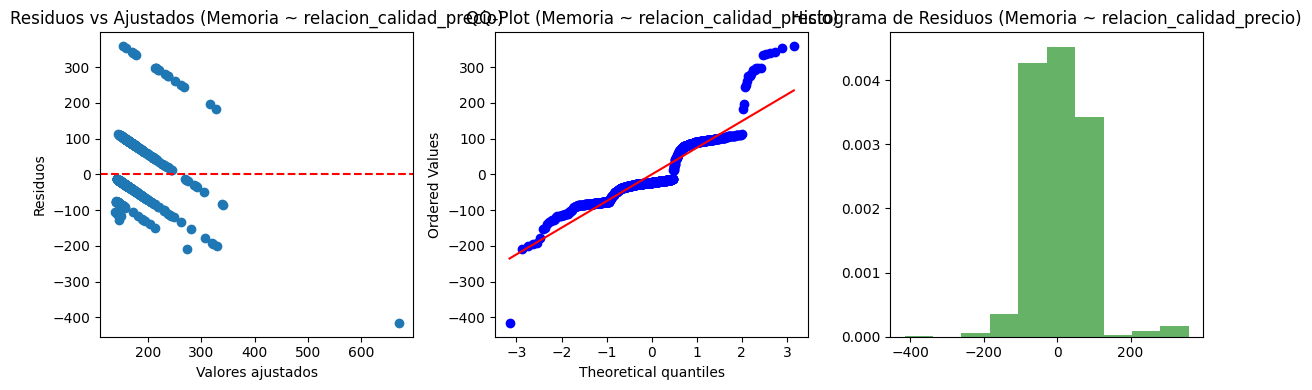

Prueba de Shapiro-Wilk para Memoria ~ relacion_calidad_precio: p-valor = 0.0000


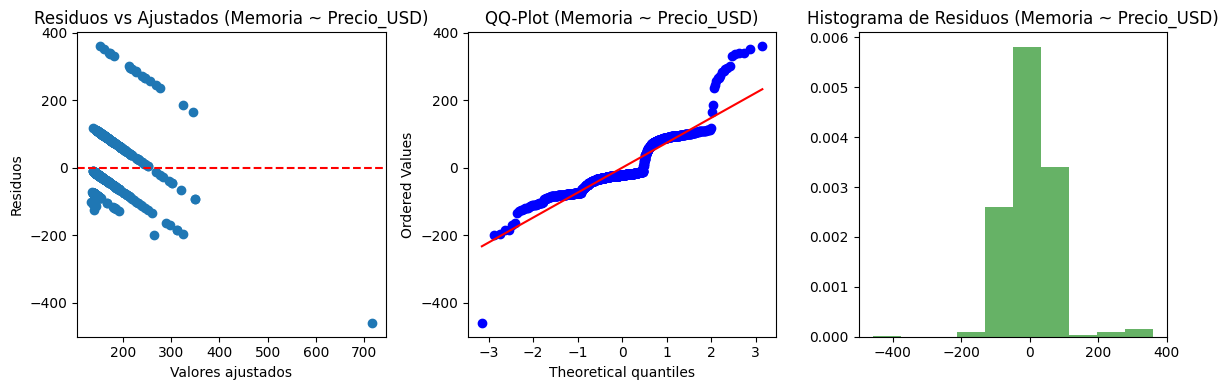

Prueba de Shapiro-Wilk para Memoria ~ Precio_USD: p-valor = 0.0000


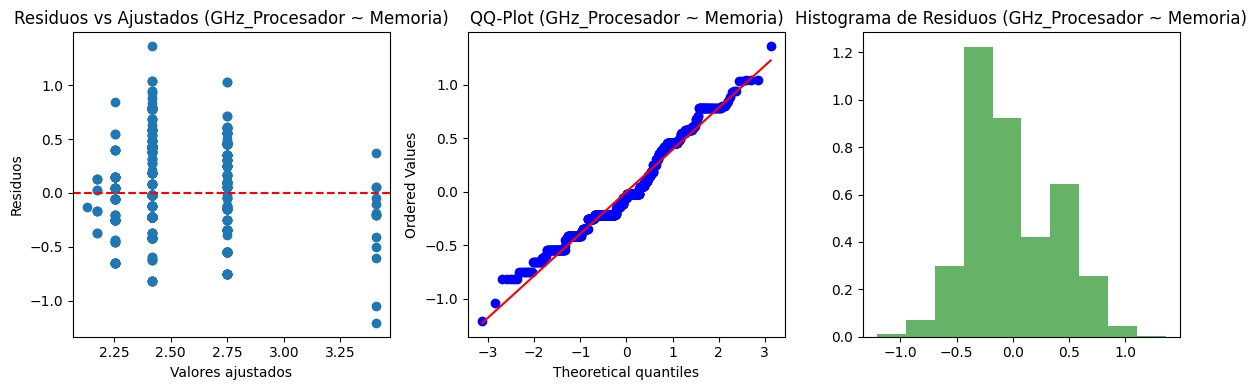

Prueba de Shapiro-Wilk para GHz_Procesador ~ Memoria: p-valor = 0.0000


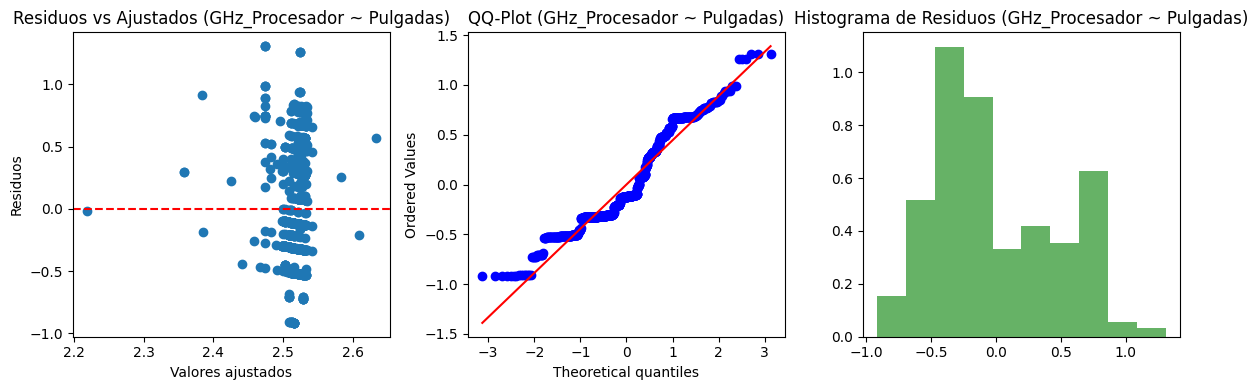

Prueba de Shapiro-Wilk para GHz_Procesador ~ Pulgadas: p-valor = 0.0000


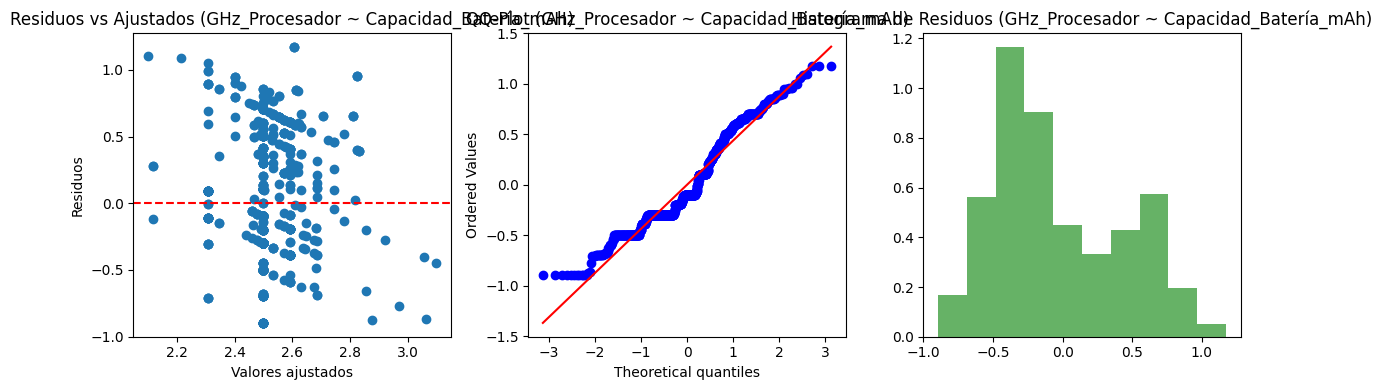

Prueba de Shapiro-Wilk para GHz_Procesador ~ Capacidad_Batería_mAh: p-valor = 0.0000


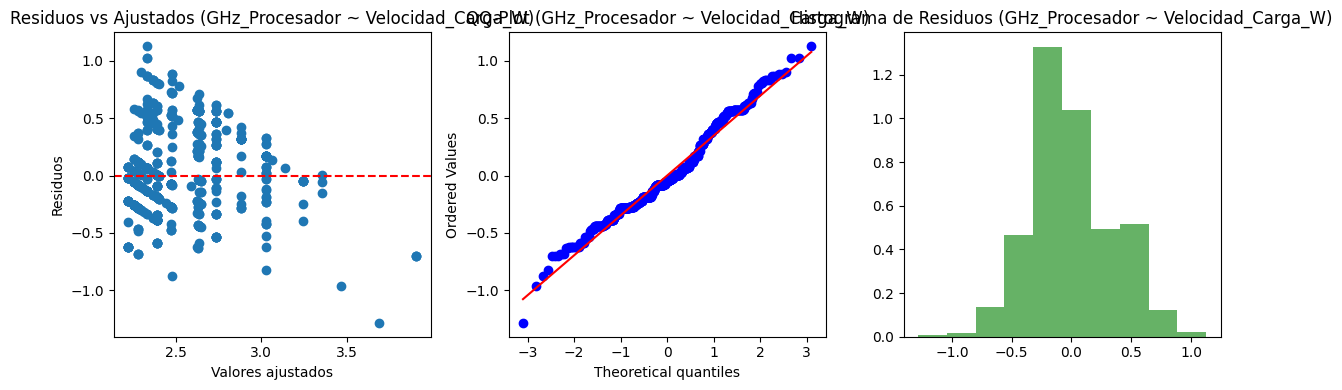

Prueba de Shapiro-Wilk para GHz_Procesador ~ Velocidad_Carga_W: p-valor = 0.0000


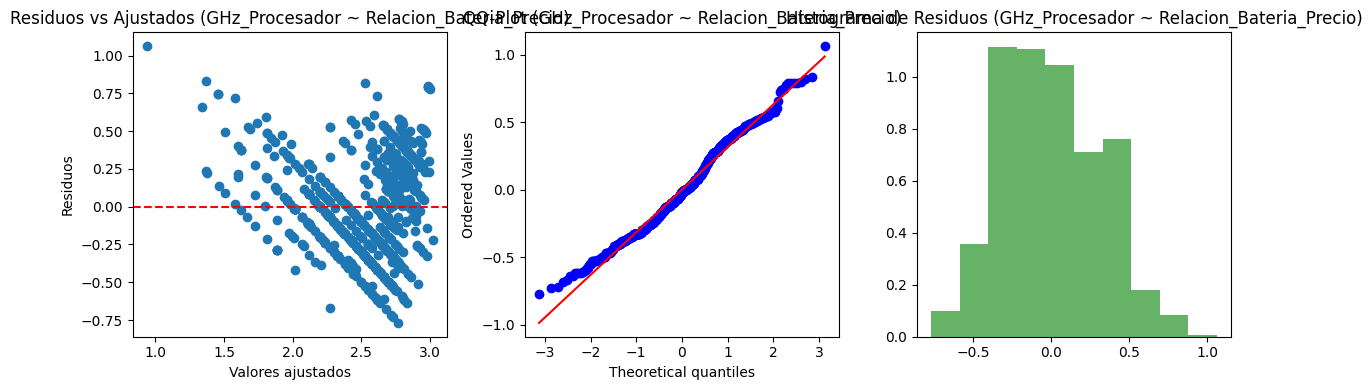

Prueba de Shapiro-Wilk para GHz_Procesador ~ Relacion_Bateria_Precio: p-valor = 0.0000


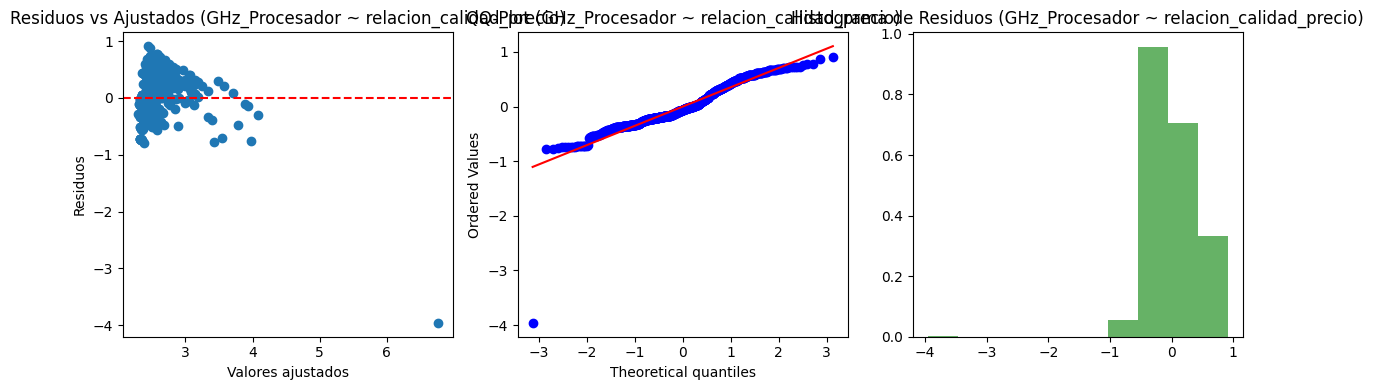

Prueba de Shapiro-Wilk para GHz_Procesador ~ relacion_calidad_precio: p-valor = 0.0000


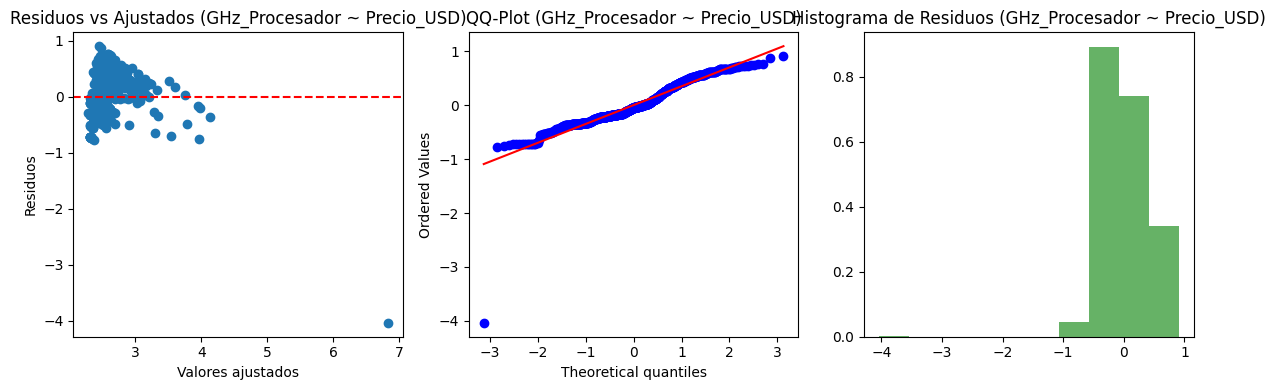

Prueba de Shapiro-Wilk para GHz_Procesador ~ Precio_USD: p-valor = 0.0000


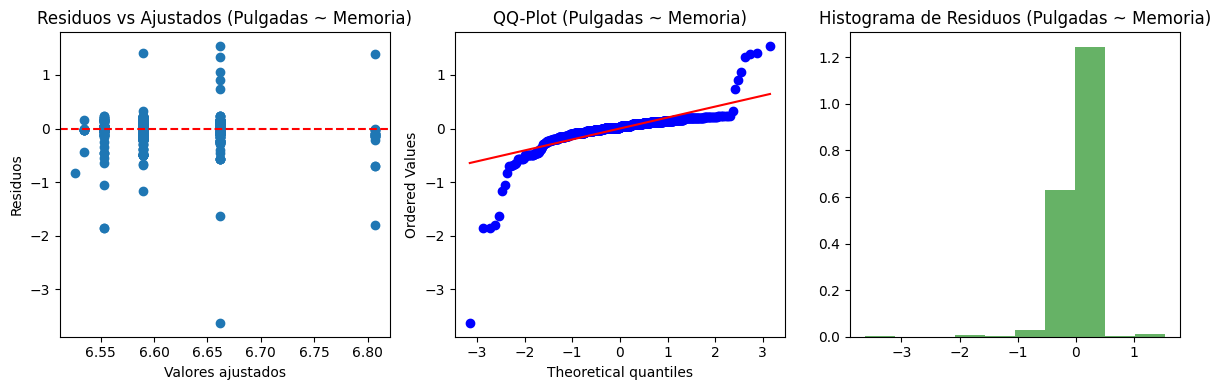

Prueba de Shapiro-Wilk para Pulgadas ~ Memoria: p-valor = 0.0000


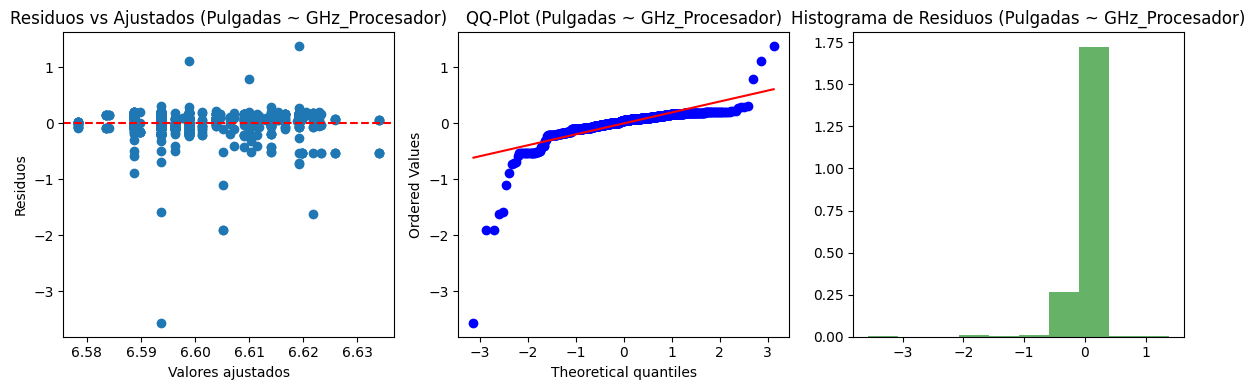

Prueba de Shapiro-Wilk para Pulgadas ~ GHz_Procesador: p-valor = 0.0000


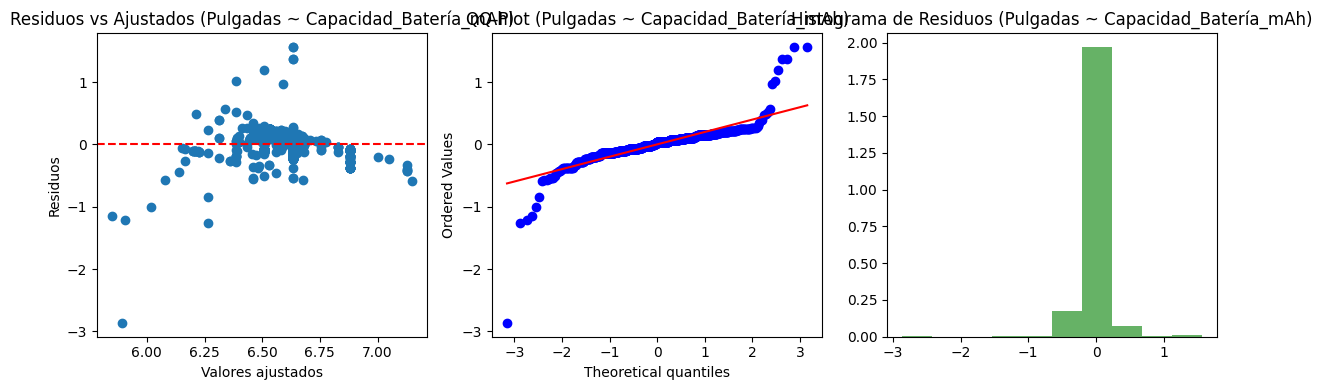

Prueba de Shapiro-Wilk para Pulgadas ~ Capacidad_Batería_mAh: p-valor = 0.0000


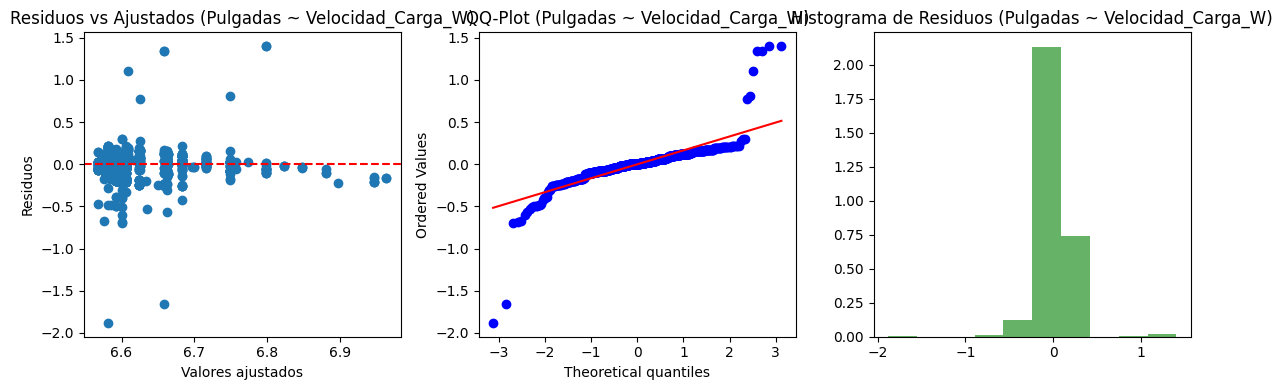

Prueba de Shapiro-Wilk para Pulgadas ~ Velocidad_Carga_W: p-valor = 0.0000


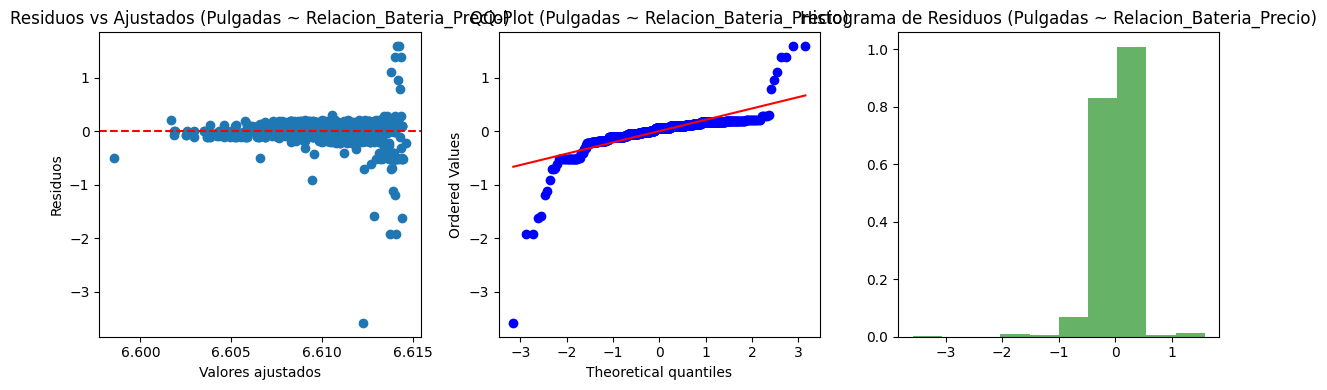

Prueba de Shapiro-Wilk para Pulgadas ~ Relacion_Bateria_Precio: p-valor = 0.0000


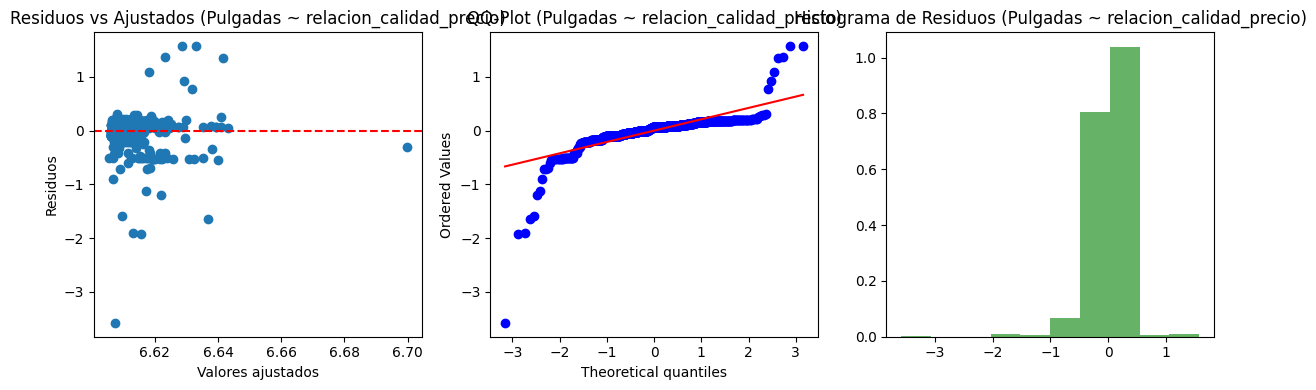

Prueba de Shapiro-Wilk para Pulgadas ~ relacion_calidad_precio: p-valor = 0.0000


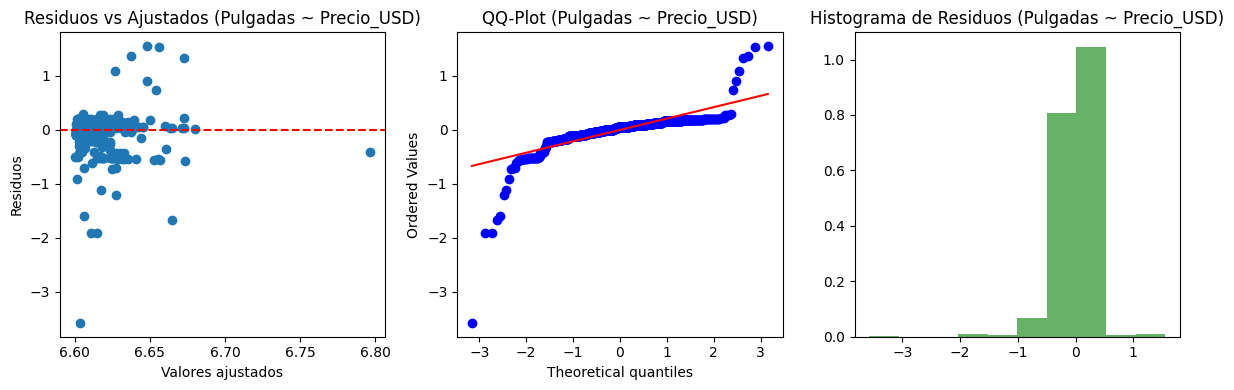

Prueba de Shapiro-Wilk para Pulgadas ~ Precio_USD: p-valor = 0.0000


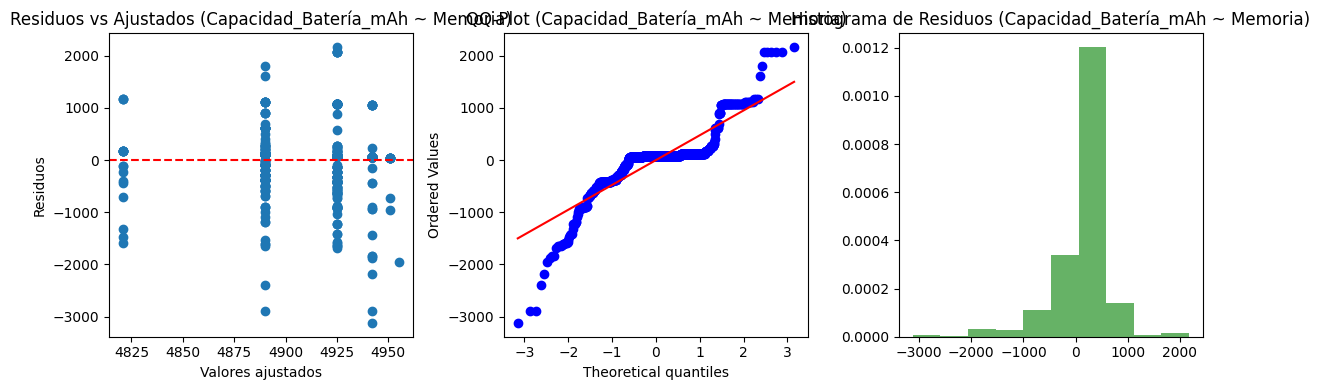

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ Memoria: p-valor = 0.0000


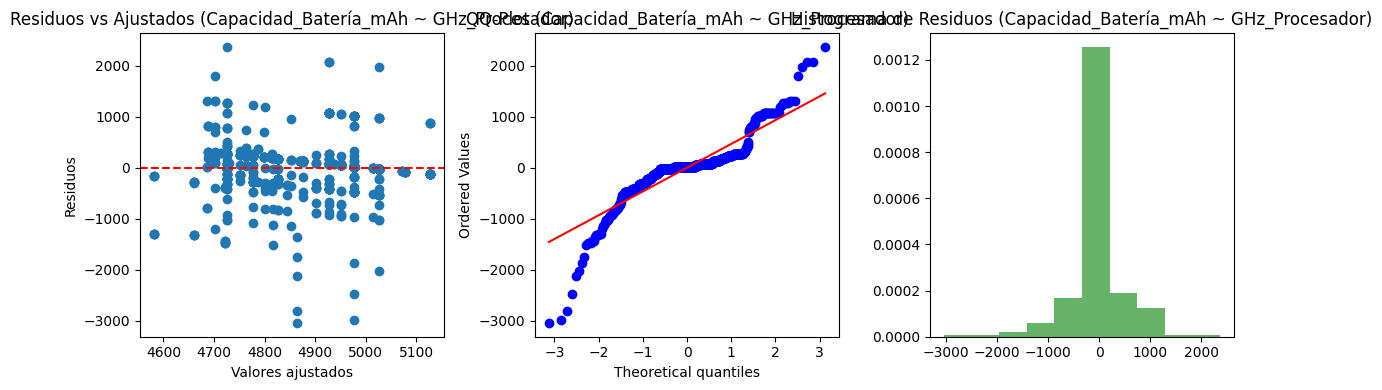

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ GHz_Procesador: p-valor = 0.0000


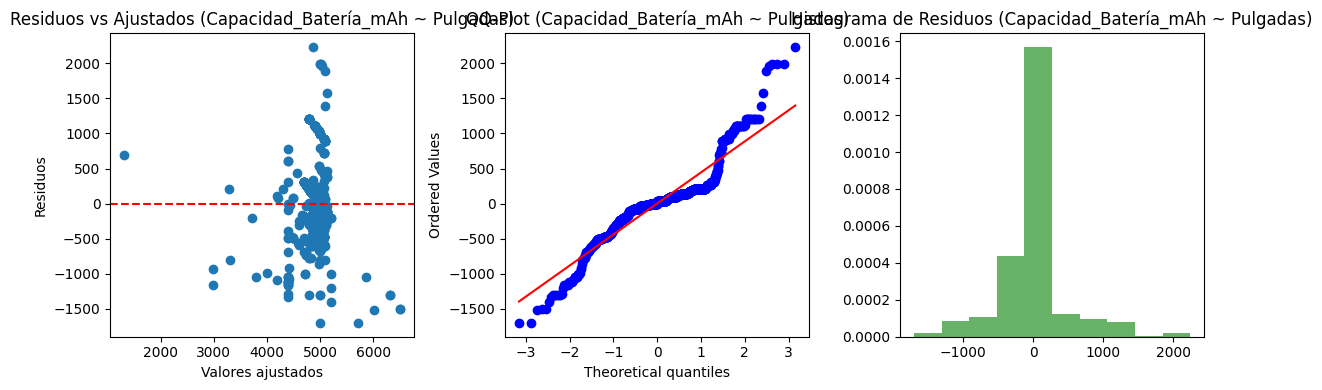

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ Pulgadas: p-valor = 0.0000


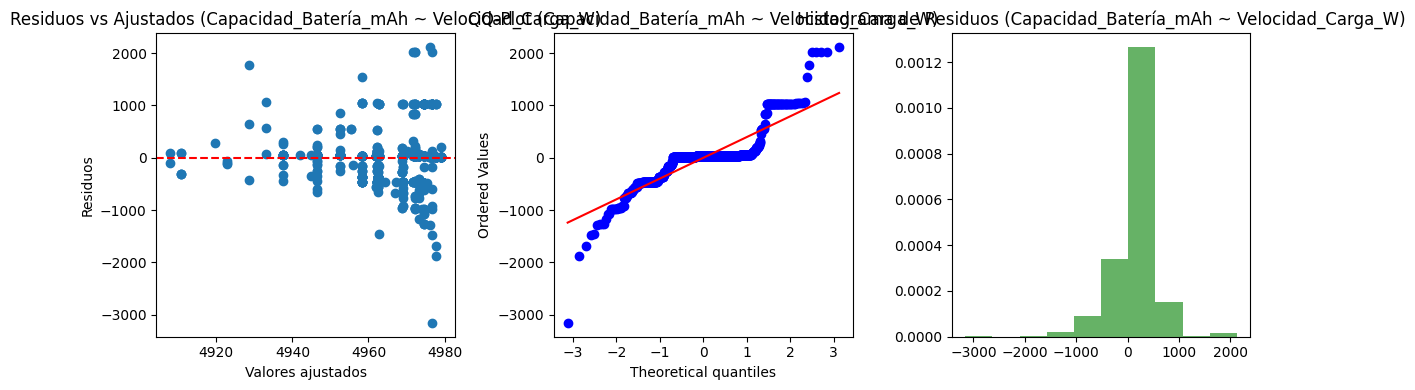

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ Velocidad_Carga_W: p-valor = 0.0000


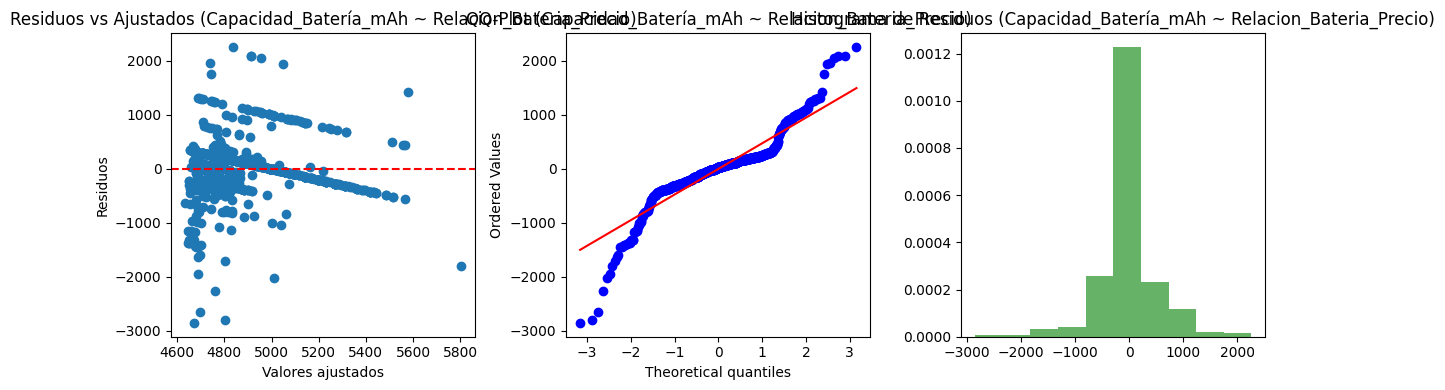

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ Relacion_Bateria_Precio: p-valor = 0.0000


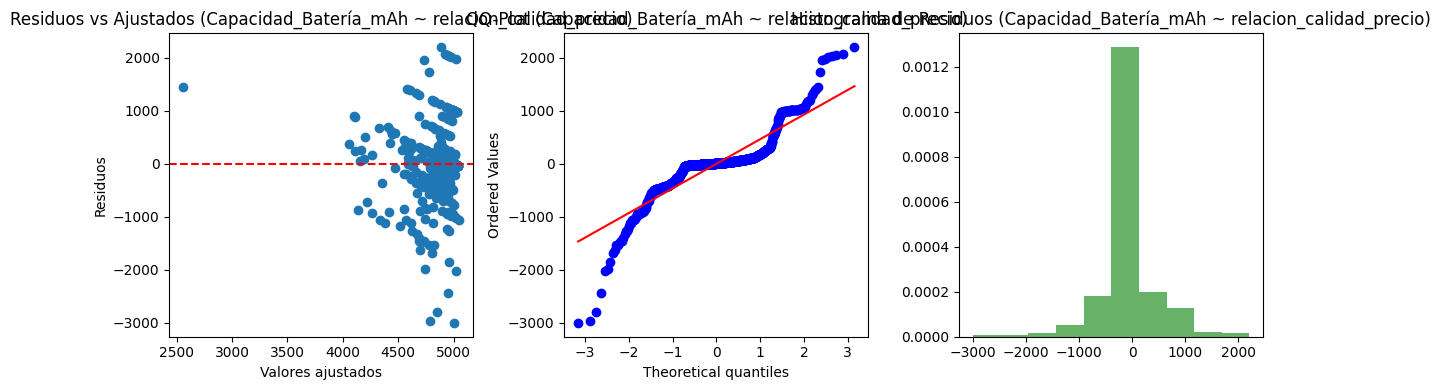

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ relacion_calidad_precio: p-valor = 0.0000


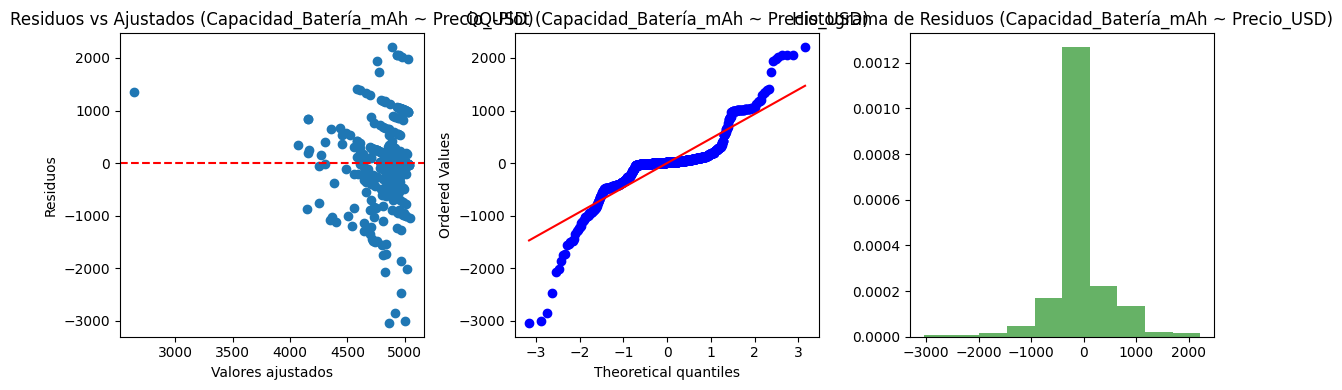

Prueba de Shapiro-Wilk para Capacidad_Batería_mAh ~ Precio_USD: p-valor = 0.0000


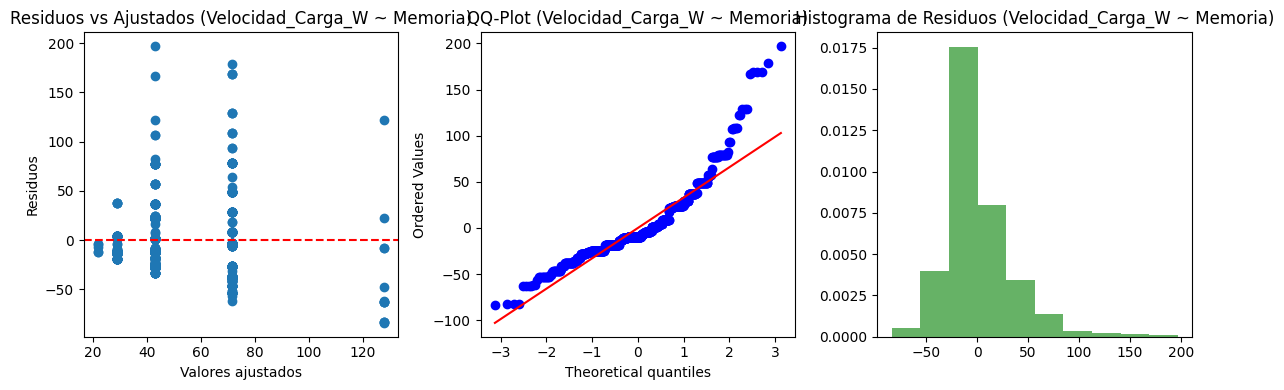

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ Memoria: p-valor = 0.0000


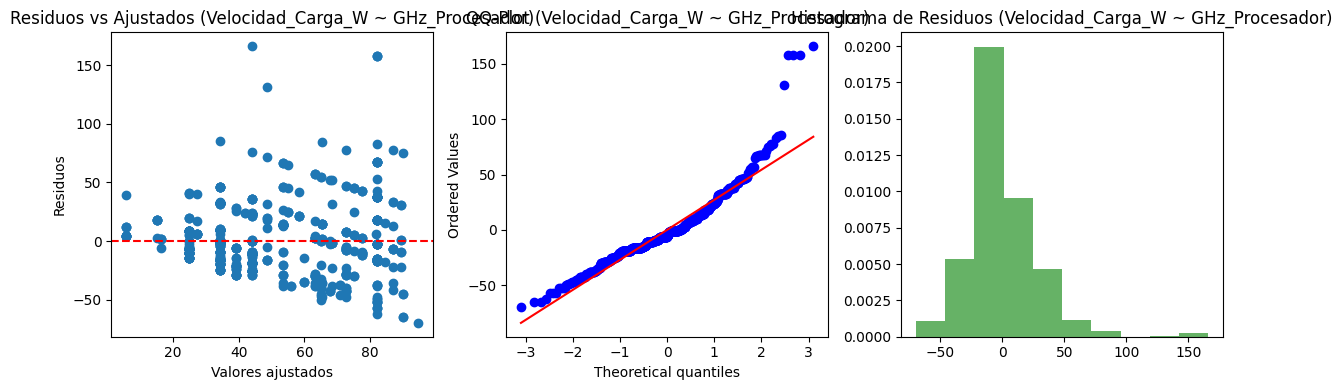

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ GHz_Procesador: p-valor = 0.0000


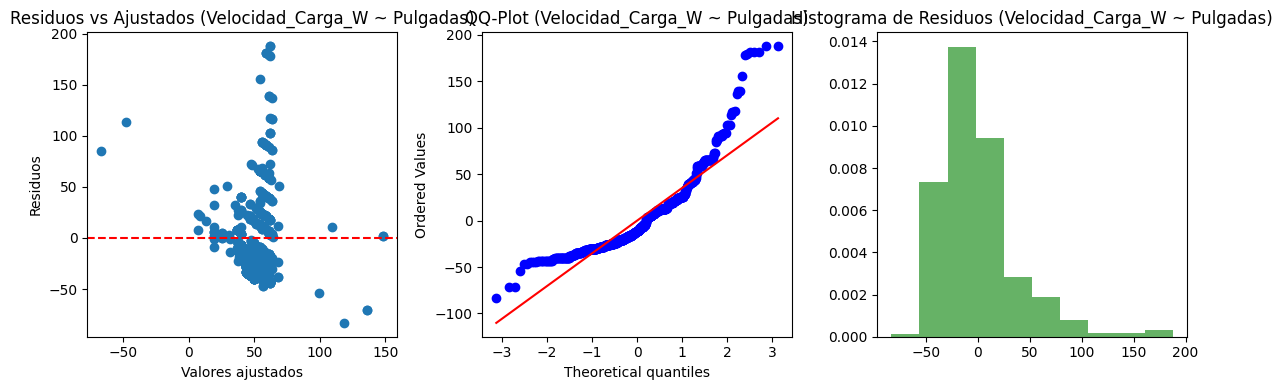

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ Pulgadas: p-valor = 0.0000


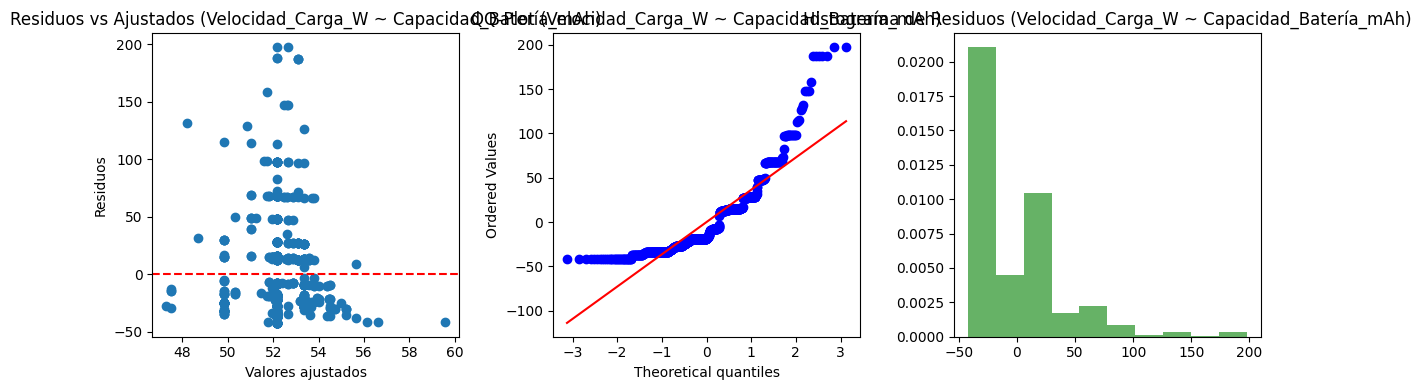

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ Capacidad_Batería_mAh: p-valor = 0.0000


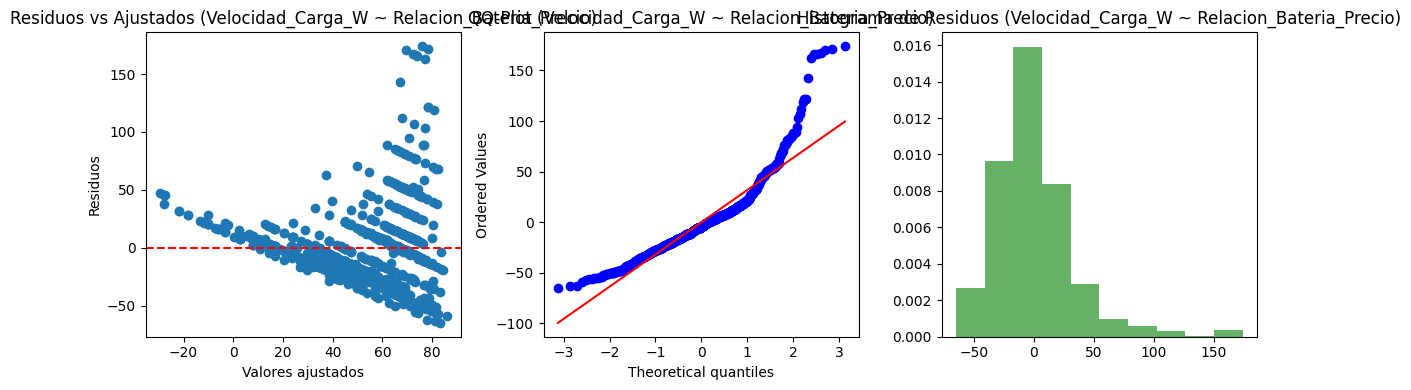

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ Relacion_Bateria_Precio: p-valor = 0.0000


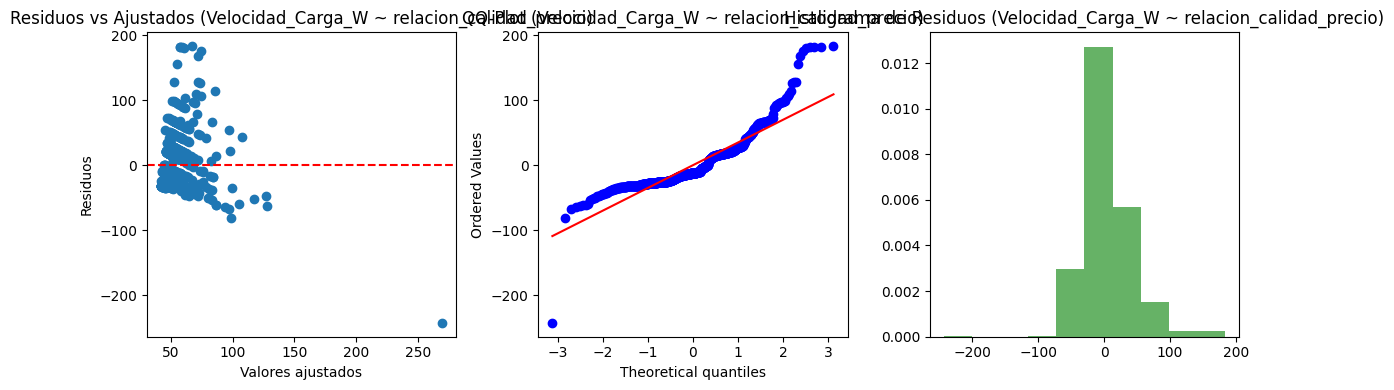

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ relacion_calidad_precio: p-valor = 0.0000


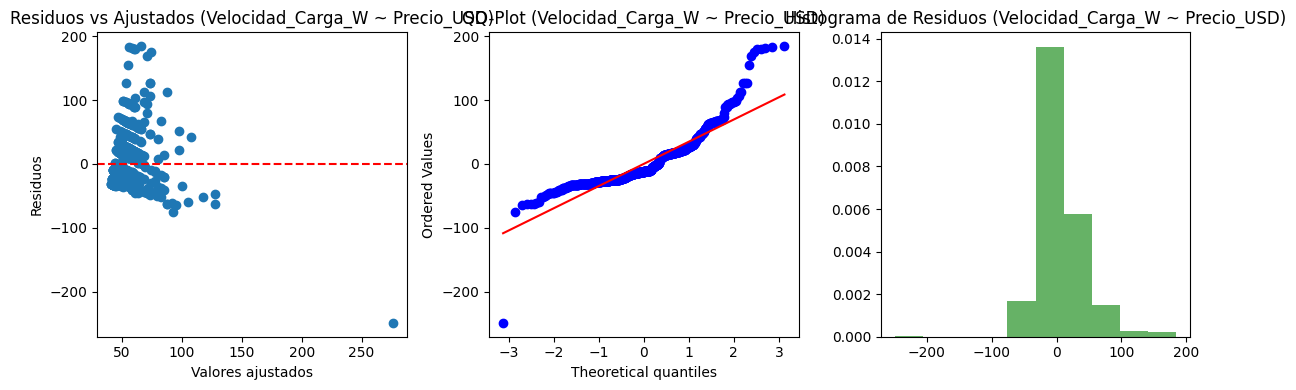

Prueba de Shapiro-Wilk para Velocidad_Carga_W ~ Precio_USD: p-valor = 0.0000


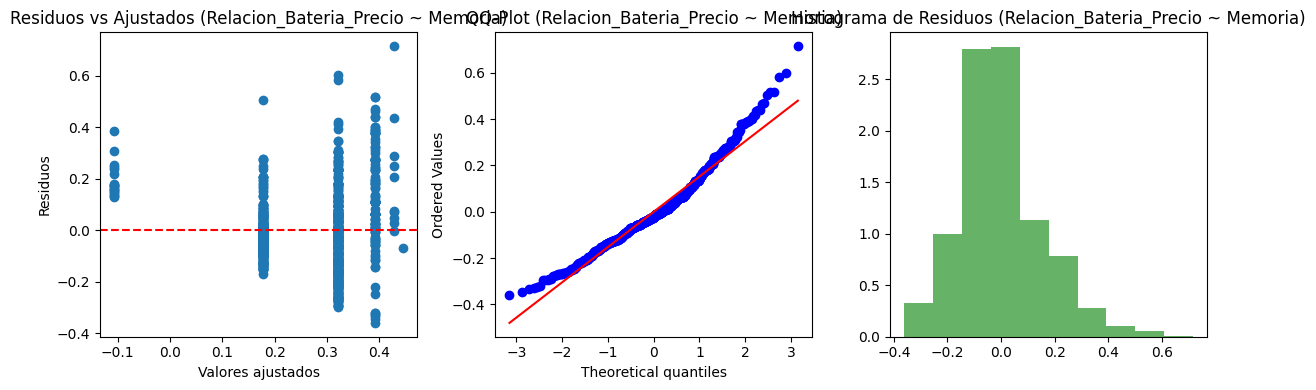

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ Memoria: p-valor = 0.0000


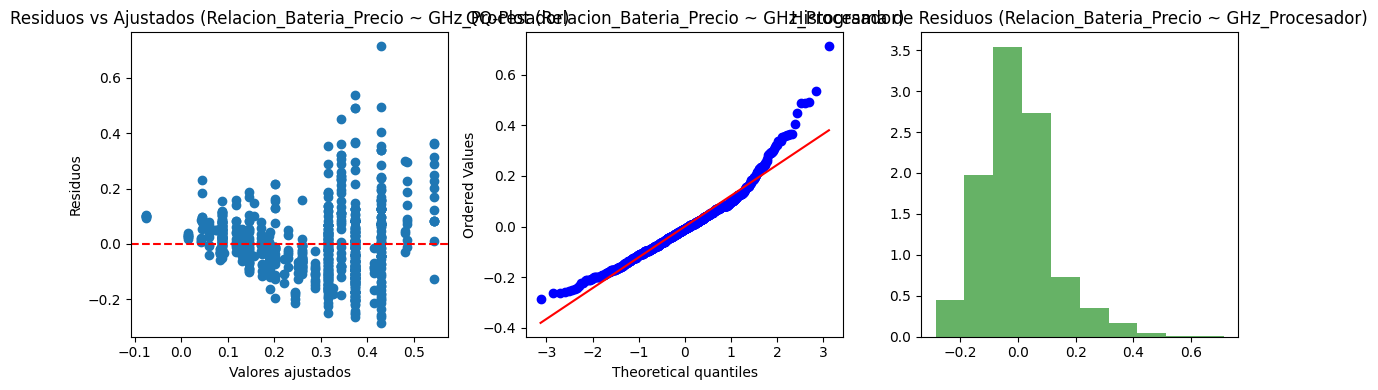

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ GHz_Procesador: p-valor = 0.0000


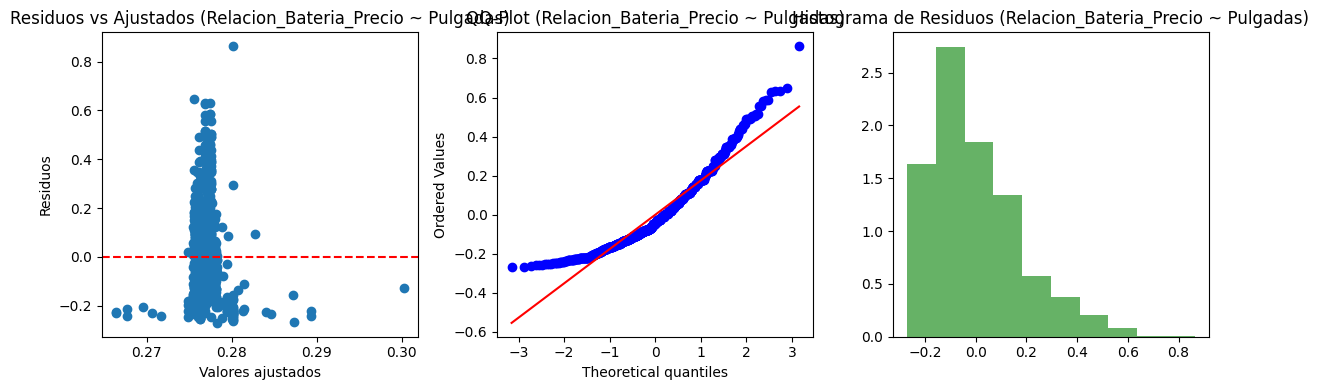

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ Pulgadas: p-valor = 0.0000


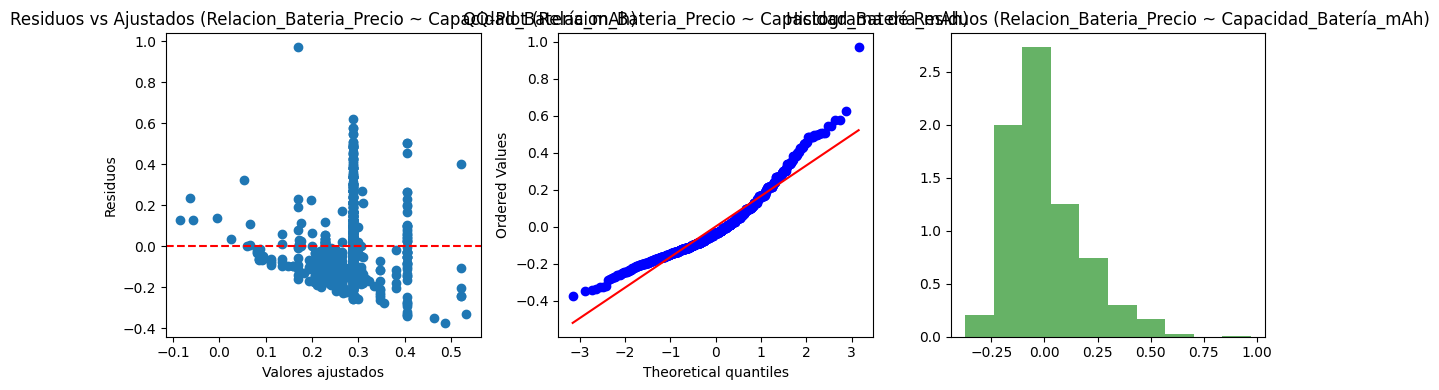

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ Capacidad_Batería_mAh: p-valor = 0.0000


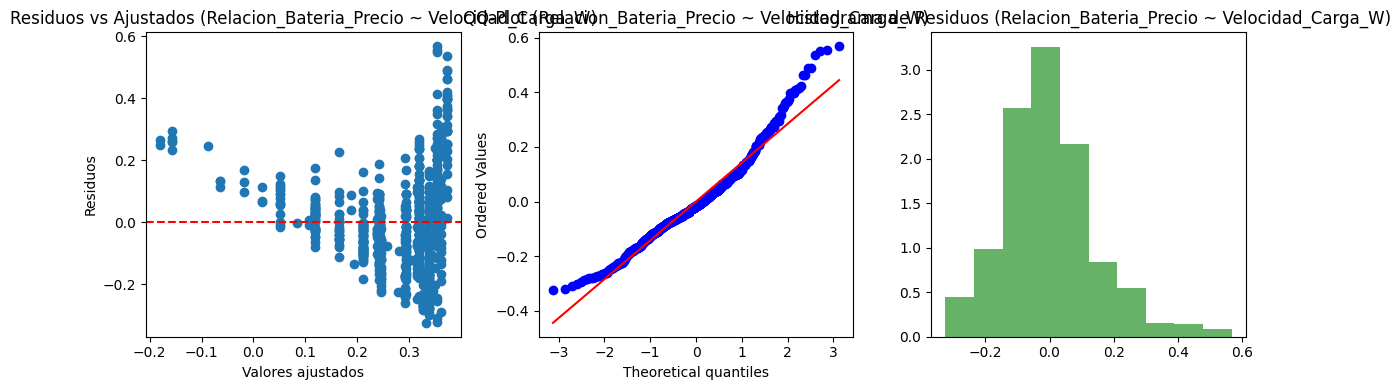

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ Velocidad_Carga_W: p-valor = 0.0000


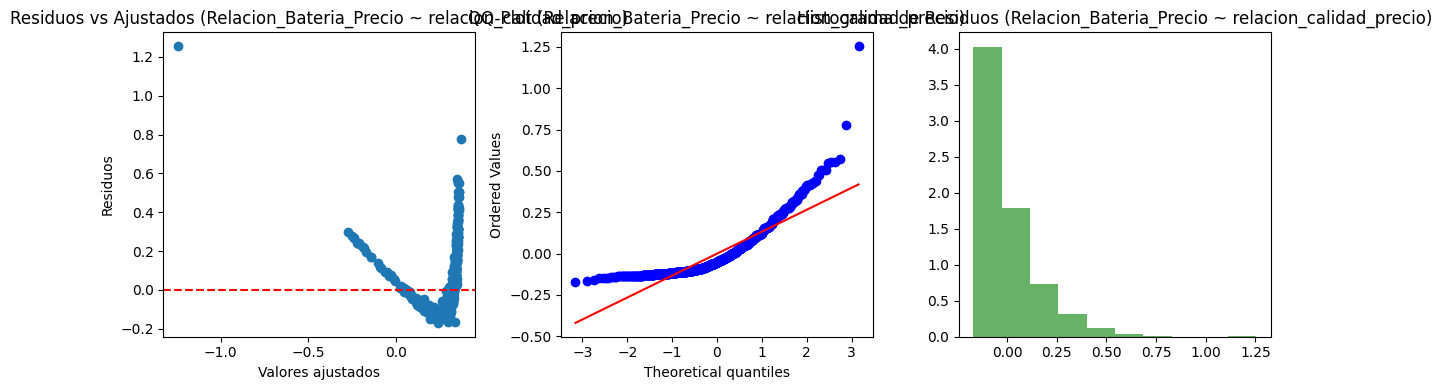

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ relacion_calidad_precio: p-valor = 0.0000


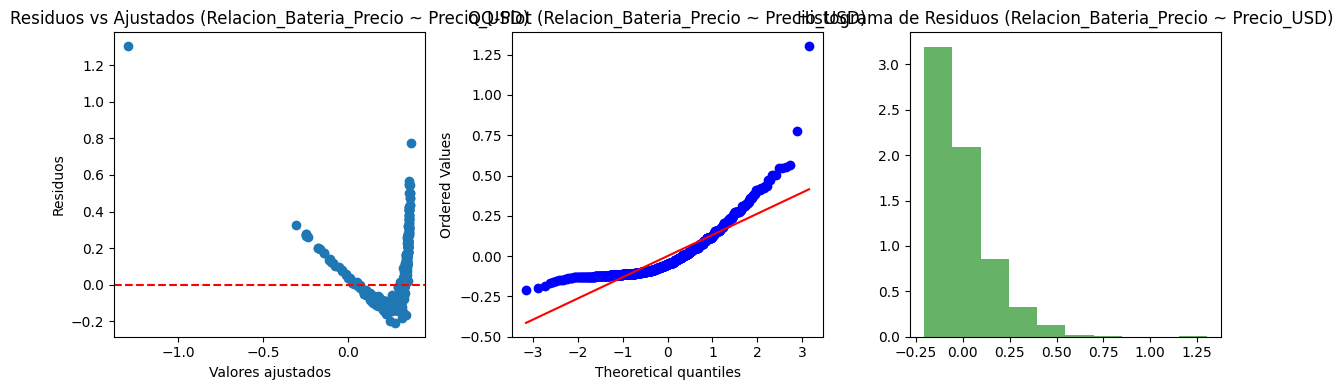

Prueba de Shapiro-Wilk para Relacion_Bateria_Precio ~ Precio_USD: p-valor = 0.0000


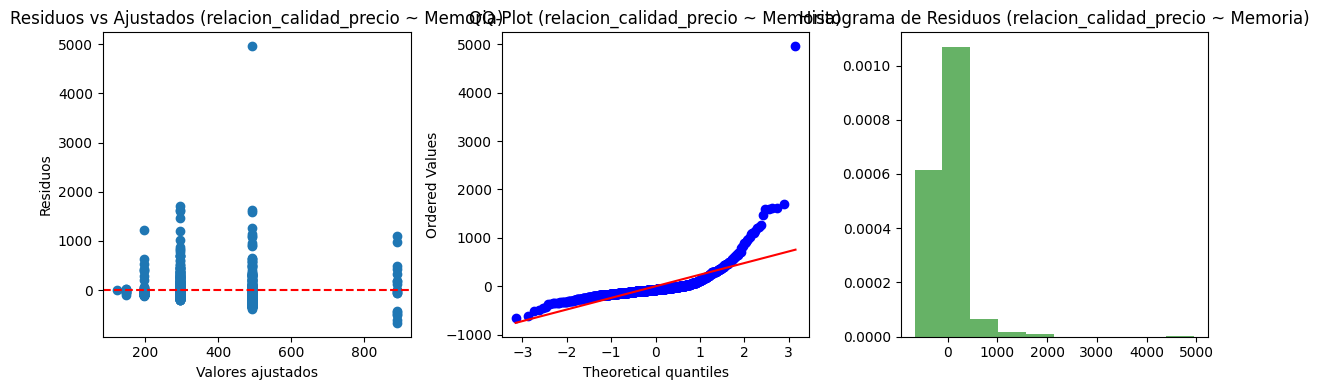

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Memoria: p-valor = 0.0000


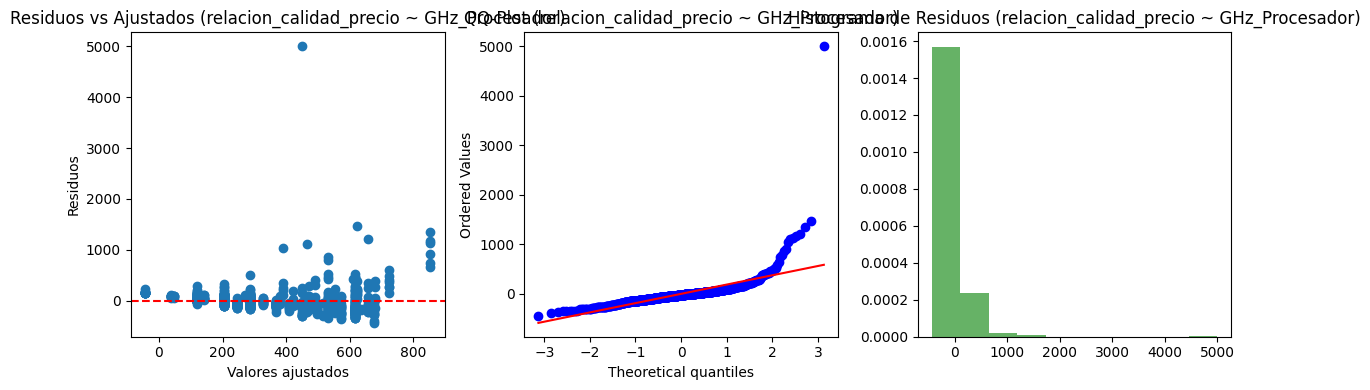

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ GHz_Procesador: p-valor = 0.0000


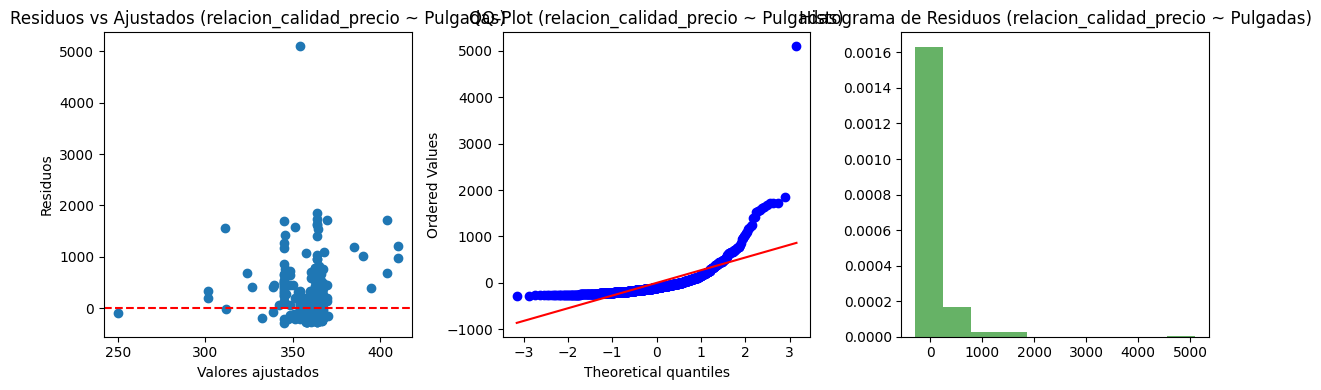

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Pulgadas: p-valor = 0.0000


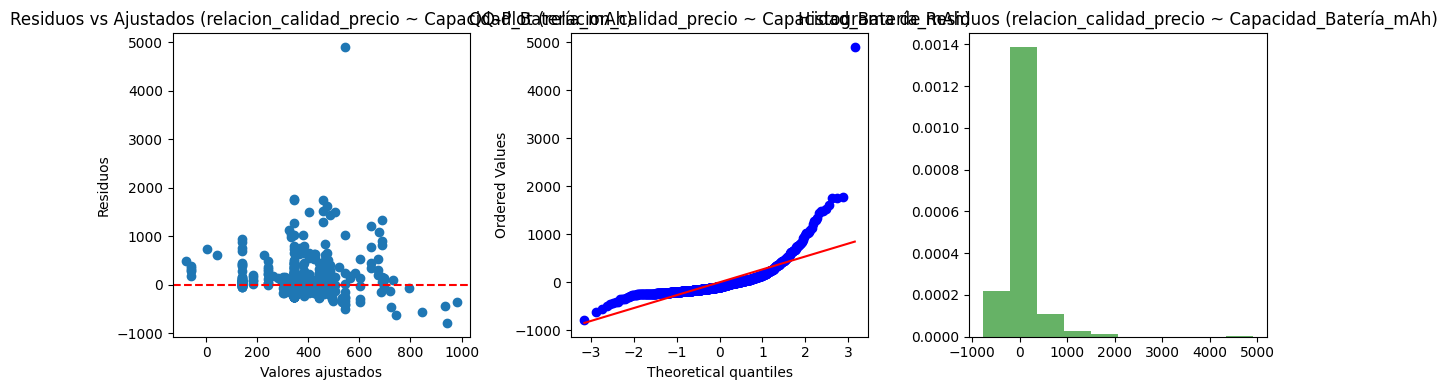

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Capacidad_Batería_mAh: p-valor = 0.0000


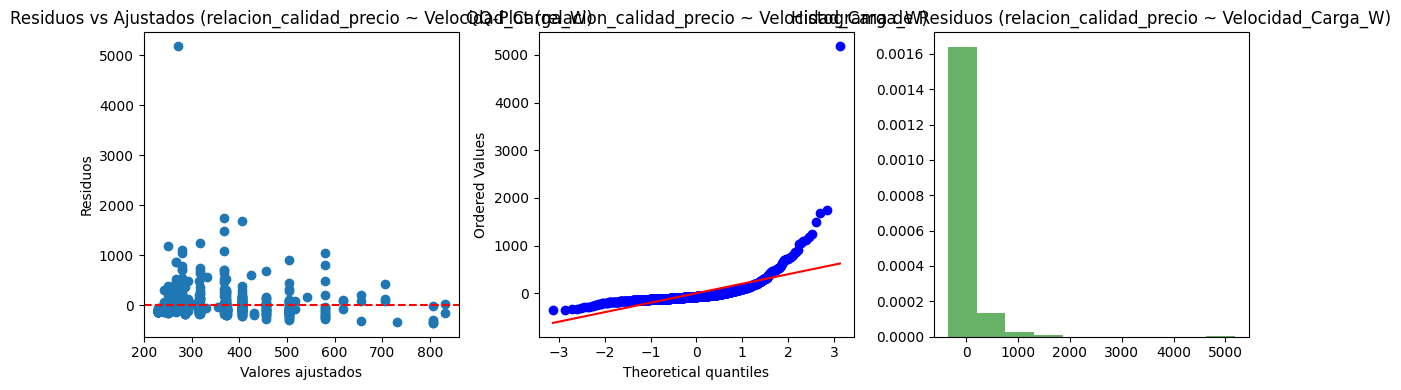

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Velocidad_Carga_W: p-valor = 0.0000


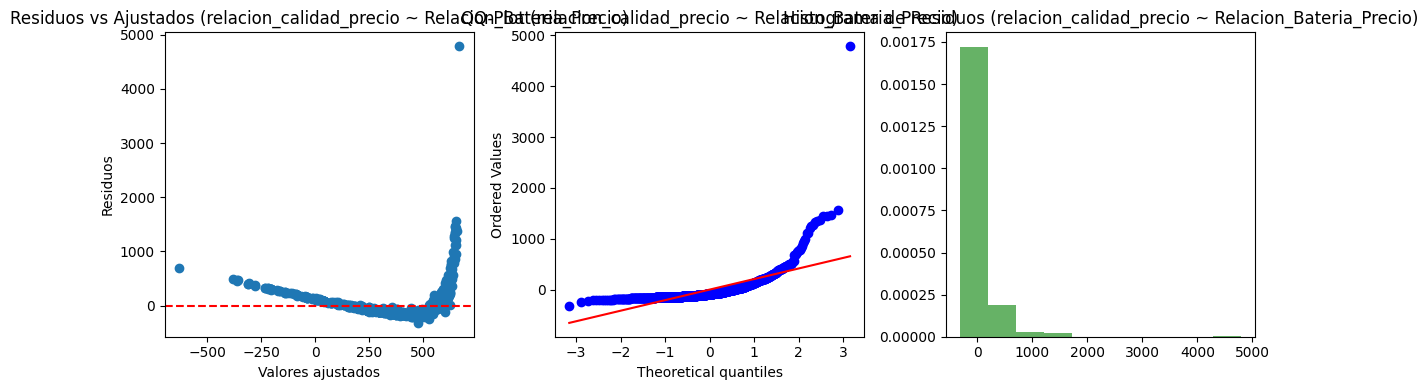

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Relacion_Bateria_Precio: p-valor = 0.0000


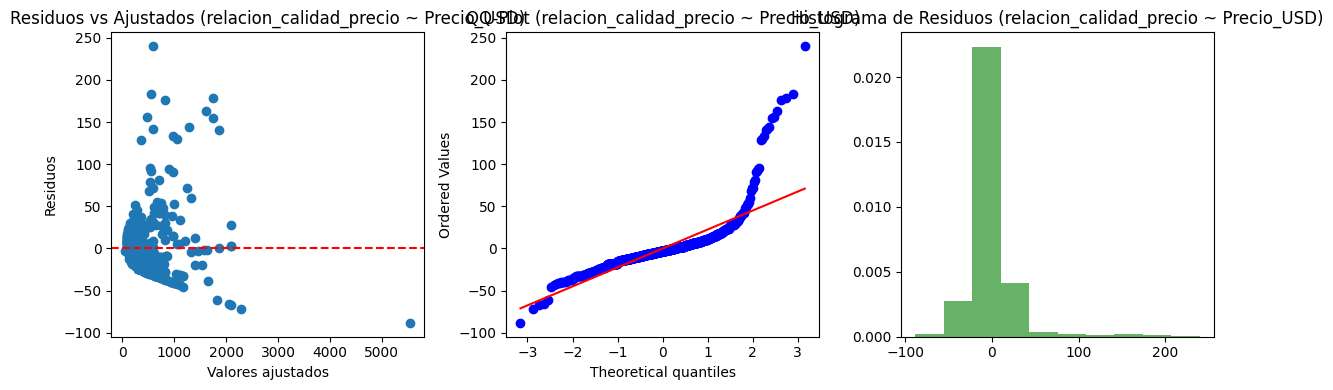

Prueba de Shapiro-Wilk para relacion_calidad_precio ~ Precio_USD: p-valor = 0.0000


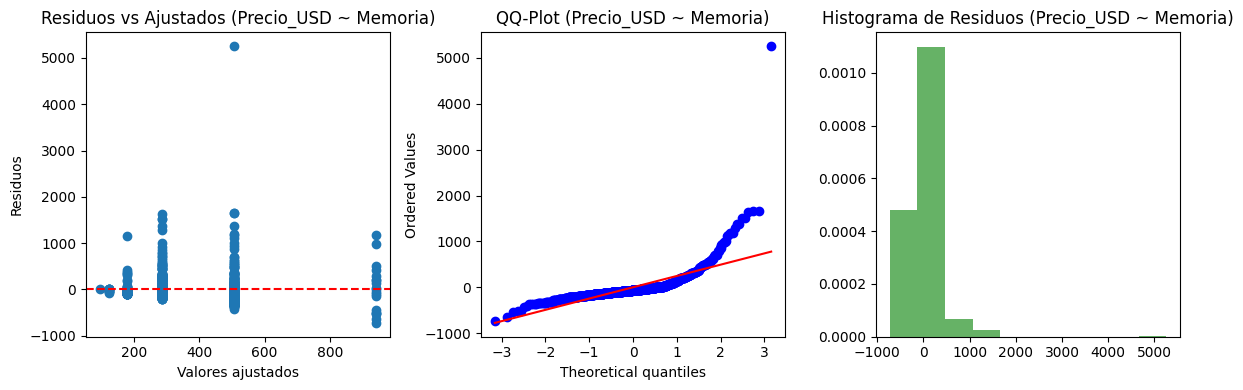

Prueba de Shapiro-Wilk para Precio_USD ~ Memoria: p-valor = 0.0000


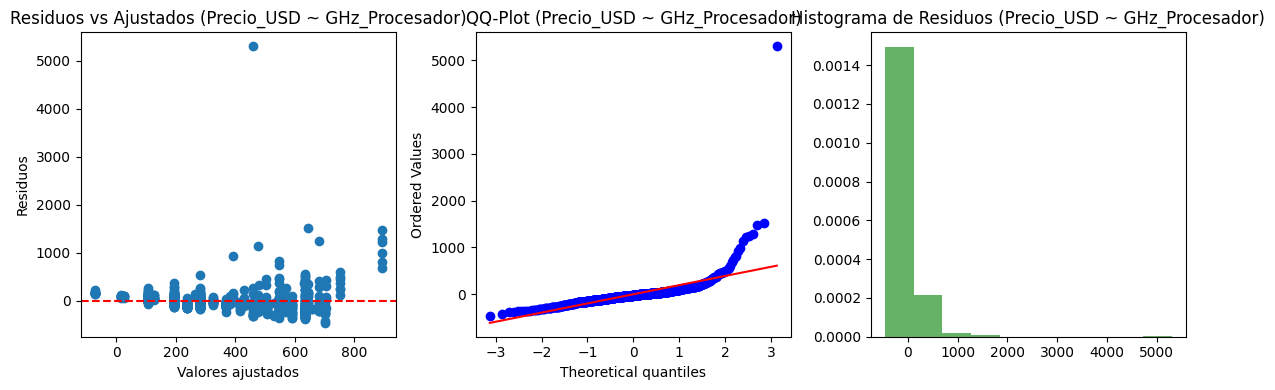

Prueba de Shapiro-Wilk para Precio_USD ~ GHz_Procesador: p-valor = 0.0000


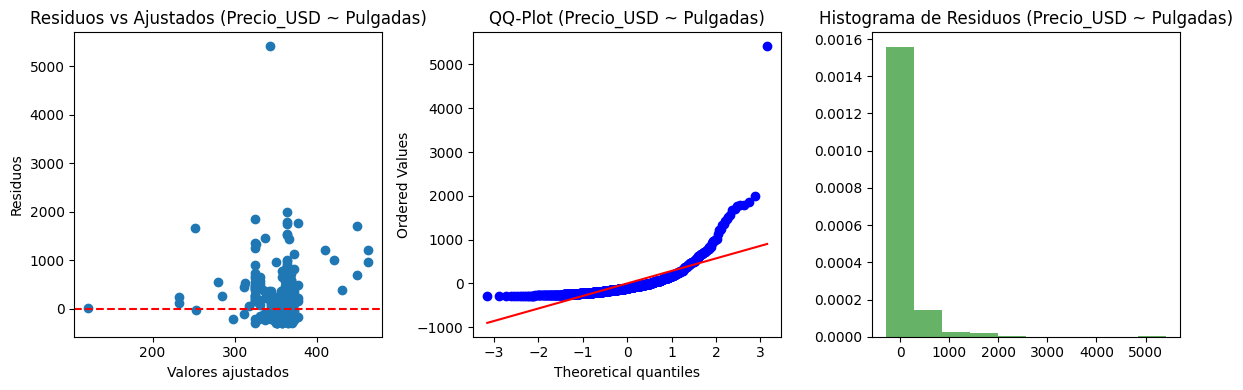

Prueba de Shapiro-Wilk para Precio_USD ~ Pulgadas: p-valor = 0.0000


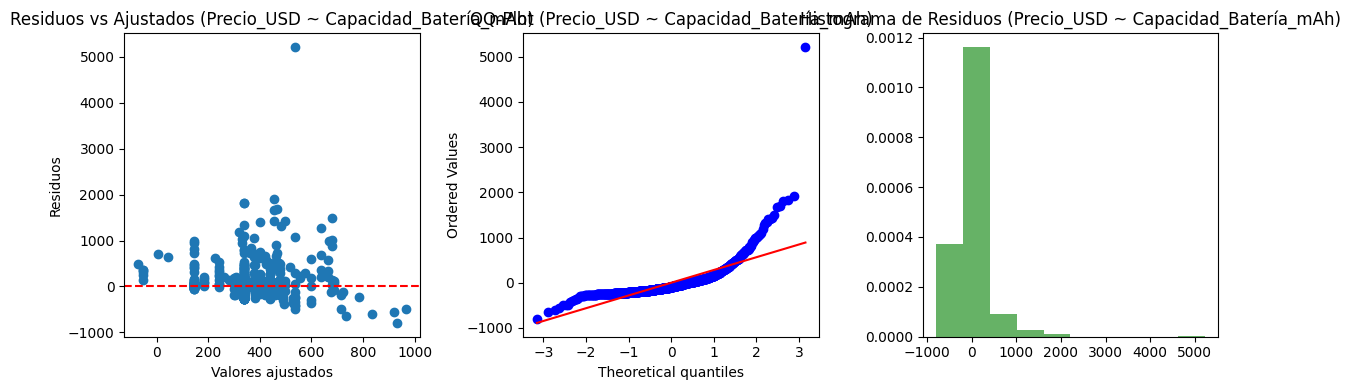

Prueba de Shapiro-Wilk para Precio_USD ~ Capacidad_Batería_mAh: p-valor = 0.0000


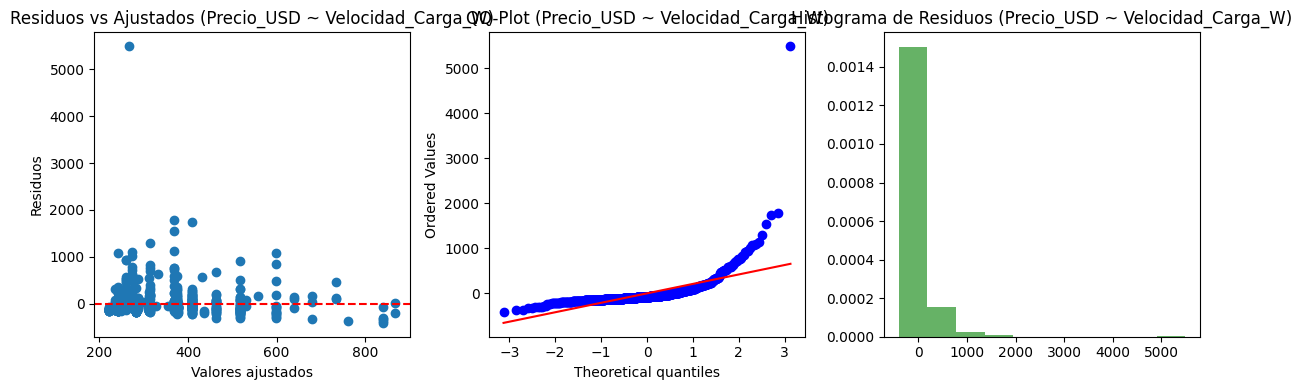

Prueba de Shapiro-Wilk para Precio_USD ~ Velocidad_Carga_W: p-valor = 0.0000


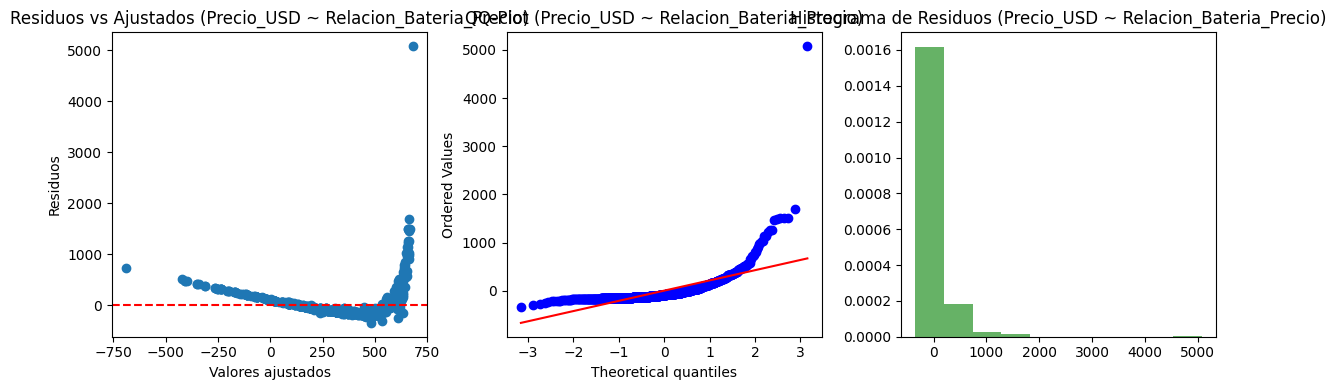

Prueba de Shapiro-Wilk para Precio_USD ~ Relacion_Bateria_Precio: p-valor = 0.0000


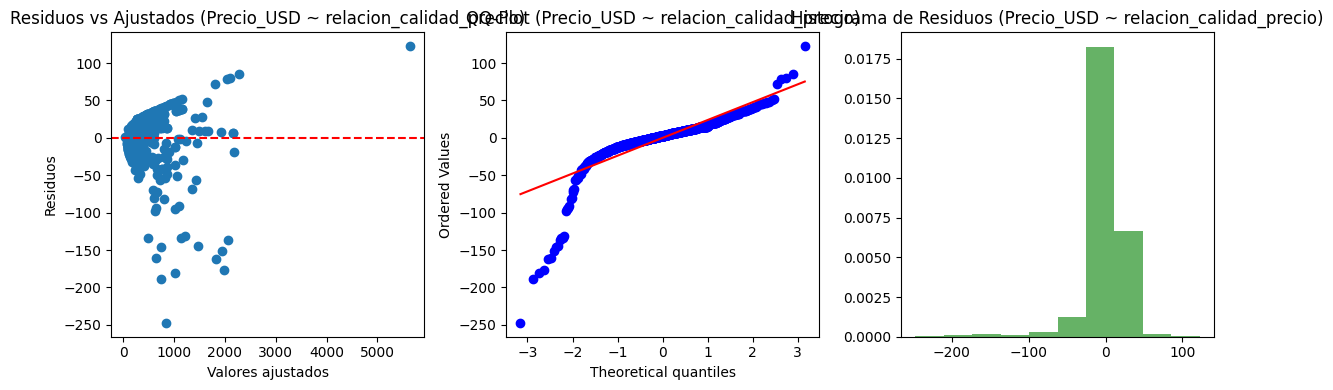

Prueba de Shapiro-Wilk para Precio_USD ~ relacion_calidad_precio: p-valor = 0.0000


In [40]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for (dependiente, independiente), r2 in resultados.items():
    formula = f'{dependiente} ~ {independiente}'
    modelo = smf.ols(formula, data=df).fit()

    # Gráficos para verificar supuestos
    plt.figure(figsize=(12, 4))

    # Gráfico de residuos vs valores ajustados (homocedasticidad)
    plt.subplot(1, 3, 1)
    plt.scatter(modelo.fittedvalues, modelo.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores ajustados')
    plt.ylabel('Residuos')
    plt.title(f'Residuos vs Ajustados ({dependiente} ~ {independiente})')

    # QQ-Plot (normalidad de residuos)
    plt.subplot(1, 3, 2)
    stats.probplot(modelo.resid, plot=plt)
    plt.title(f'QQ-Plot ({dependiente} ~ {independiente})')

    # Histograma de residuos (normalidad)
    plt.subplot(1, 3, 3)
    plt.hist(modelo.resid, bins=10, density=True, alpha=0.6, color='g')
    plt.title(f'Histograma de Residuos ({dependiente} ~ {independiente})')

    plt.tight_layout()
    plt.show()

    # Prueba de normalidad de residuos (Shapiro-Wilk)
    shapiro_test = stats.shapiro(modelo.resid)
    print(f'Prueba de Shapiro-Wilk para {dependiente} ~ {independiente}: p-valor = {shapiro_test.pvalue:.4f}')

In [41]:

mejor_combinacion = max(resultados, key=resultados.get)
mejor_r2 = resultados[mejor_combinacion]
print(f'La mejor combinación es Dependiente: {mejor_combinacion[0]}, Independiente: {mejor_combinacion[1]} con un R² de {mejor_r2:.4f}')

# Encontrar el segundo mejor modelo
resultados_sin_mejor = {k: v for k, v in resultados.items() if k != mejor_combinacion}
segunda_mejor_combinacion = max(resultados_sin_mejor, key=resultados_sin_mejor.get)
segundo_mejor_r2 = resultados_sin_mejor[segunda_mejor_combinacion]

print(f'La segunda mejor combinación es Dependiente: {segunda_mejor_combinacion[0]}, Independiente: {segunda_mejor_combinacion[1]} con un R² de {segundo_mejor_r2:.4f}')

La mejor combinación es Dependiente: relacion_calidad_precio, Independiente: Precio_USD con un R² de 0.9943
La segunda mejor combinación es Dependiente: Precio_USD, Independiente: relacion_calidad_precio con un R² de 0.9943


In [44]:
import numpy as np

df_cleaned = df.replace([np.inf, -np.inf], np.nan)  # Convertir inf a NaN
df_cleaned = df_cleaned.dropna(subset=variables_independientes + variables_dependientes)  # Eliminar filas con NaN

In [50]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Inicializar la lista para almacenar los resúmenes de los modelos
resumen_modelos = []

# Iterar sobre cada par de variables
for dependiente in variables_dependientes:
    for independiente in variables_independientes:
        if dependiente != independiente:
            print(f"Analizando modelo: {dependiente} ~ {independiente}")
            
            # Seleccionar las variables
            X = df_cleaned[independiente]
            y = df_cleaned[dependiente]
            
            # Añadir una constante a la variable independiente
            X = sm.add_constant(X)
            
            # Ajustar el modelo de regresión lineal
            modelo = sm.OLS(y, X).fit()
            
            # Extraer R-cuadrado
            r_cuadrado = modelo.rsquared
            
            # Verificar los supuestos
            rainbow_test = linear_rainbow(modelo)
            linealidad = rainbow_test[1] > 0.05  # True si se cumple
            
            bp_test = het_breuschpagan(modelo.resid, modelo.model.exog)
            homocedasticidad = bp_test[1] > 0.05  # True si se cumple
            
            shapiro_test = shapiro(modelo.resid)
            normalidad = shapiro_test[1] > 0.05  # True si se cumple
            
            dw_test = sm.stats.durbin_watson(modelo.resid)
            independencia = 1.5 < dw_test < 2.5  # True si se cumple
            
            # Guardar el resumen del modelo
            resumen_modelos.append({
                'Dependiente': dependiente,
                'Independiente': independiente,
                'R-cuadrado': r_cuadrado,
                'Linealidad': linealidad,
                'Homocedasticidad': homocedasticidad,
                'Normalidad': normalidad,
                'Independencia': independencia
            })
            
            print(f"Modelo {dependiente} ~ {independiente} completado.\n")

# Convertir la lista de resúmenes en un DataFrame
resumen_df = pd.DataFrame(resumen_modelos)

# Mostrar el resumen de todos los modelos
resumen_df

Analizando modelo: Memoria ~ GHz_Procesador
Modelo Memoria ~ GHz_Procesador completado.

Analizando modelo: Memoria ~ Pulgadas
Modelo Memoria ~ Pulgadas completado.

Analizando modelo: Memoria ~ Capacidad_Batería_mAh
Modelo Memoria ~ Capacidad_Batería_mAh completado.

Analizando modelo: Memoria ~ Velocidad_Carga_W
Modelo Memoria ~ Velocidad_Carga_W completado.

Analizando modelo: Memoria ~ Relacion_Bateria_Precio
Modelo Memoria ~ Relacion_Bateria_Precio completado.

Analizando modelo: Memoria ~ relacion_calidad_precio
Modelo Memoria ~ relacion_calidad_precio completado.

Analizando modelo: Memoria ~ Precio_USD
Modelo Memoria ~ Precio_USD completado.

Analizando modelo: GHz_Procesador ~ Memoria
Modelo GHz_Procesador ~ Memoria completado.

Analizando modelo: GHz_Procesador ~ Pulgadas
Modelo GHz_Procesador ~ Pulgadas completado.

Analizando modelo: GHz_Procesador ~ Capacidad_Batería_mAh
Modelo GHz_Procesador ~ Capacidad_Batería_mAh completado.

Analizando modelo: GHz_Procesador ~ Velocida

Dependiente            Independiente  R-cuadrado  Linealidad  \
0                   Memoria           GHz_Procesador    0.214253        True   
1                   Memoria                 Pulgadas    0.047314        True   
2                   Memoria    Capacidad_Batería_mAh    0.000038        True   
3                   Memoria        Velocidad_Carga_W    0.178538        True   
4                   Memoria  Relacion_Bateria_Precio    0.280592        True   
5                   Memoria  relacion_calidad_precio    0.130123        True   
6                   Memoria               Precio_USD    0.144553        True   
7            GHz_Procesador                  Memoria    0.214253        True   
8            GHz_Procesador                 Pulgadas    0.010713        True   
9            GHz_Procesador    Capacidad_Batería_mAh    0.018242        True   
10           GHz_Procesador        Velocidad_Carga_W    0.350383        True   
11           GHz_Procesador  Relacion_Bateria_Precio    0.497261        True   
12           GHz_Procesador  relacion_calidad_precio    0.251632        True   
13           GHz_Procesador               Precio_USD    0.265677        True   
14                 Pulgadas                  Memoria    0.047314        True   
15                 Pulgadas           GHz_Procesador    0.010713        True   
16                 Pulgadas    Capacidad_Batería_mAh    0.116883        True   
17                 Pulgadas        Velocidad_Carga_W    0.078239        True   
18                 Pulgadas  Relacion_Bateria_Precio    0.001084        True   
19                 Pulgadas  relacion_calidad_precio    0.002066        True   
20                 Pulgadas               Precio_USD    0.000687        True   
21    Capacidad_Batería_mAh                  Memoria    0.000038        True   
22    Capacidad_Batería_mAh           GHz_Procesador    0.018242        True   
23    Capacidad_Batería_mAh                 Pulgadas    0.116883        True   
24    Capacidad_Batería_mAh        Velocidad_Carga_W    0.000849        True   
25    Capacidad_Batería_mAh  Relacion_Bateria_Precio    0.113710        True   
26    Capacidad_Batería_mAh  relacion_calidad_precio    0.058982        True   
27    Capacidad_Batería_mAh               Precio_USD    0.055123        True   
28        Velocidad_Carga_W                  Memoria    0.178538        True   
29        Velocidad_Carga_W           GHz_Procesador    0.350383        True   
30        Velocidad_Carga_W                 Pulgadas    0.078239        True   
31        Velocidad_Carga_W    Capacidad_Batería_mAh    0.000849        True   
32        Velocidad_Carga_W  Relacion_Bateria_Precio    0.288102        True   
33        Velocidad_Carga_W  relacion_calidad_precio    0.057702        True   
34        Velocidad_Carga_W               Precio_USD    0.064972        True   
35  Relacion_Bateria_Precio                  Memoria    0.280592        True   
36  Relacion_Bateria_Precio           GHz_Procesador    0.497261        True   
37  Relacion_Bateria_Precio                 Pulgadas    0.001084        True   
38  Relacion_Bateria_Precio    Capacidad_Batería_mAh    0.113710        True   
39  Relacion_Bateria_Precio        Velocidad_Carga_W    0.288102        True   
40  Relacion_Bateria_Precio  relacion_calidad_precio    0.306702        True   
41  Relacion_Bateria_Precio               Precio_USD    0.319688        True   
42  relacion_calidad_precio                  Memoria    0.130123        True   
43  relacion_calidad_precio           GHz_Procesador    0.251632        True   
44  relacion_calidad_precio                 Pulgadas    0.002066        True   
45  relacion_calidad_precio    Capacidad_Batería_mAh    0.058982        True   
46  relacion_calidad_precio        Velocidad_Carga_W    0.057702        True   
47  relacion_calidad_precio  Relacion_Bateria_Precio    0.306702        True   
48  relacion_calidad_precio               Precio_USD    0.996893        True   
49              